## Installation ##

In [1]:
!pip install --upgrade pip
!pip install numpy qulacs matplotlib

'pip' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B
'pip' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


## Set variables ##

In [1]:
from pathlib import Path
import os
os.chdir(Path().resolve())

In [2]:
# install functions
from MultidimensionalQFT import Preprocessing, FTManager
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from mpl_toolkits.axes_grid1 import make_axes_locatable 
from matplotlib.ticker import MaxNLocator
FT = FTManager()

In [3]:
# about materials dealt with
CeO2_100             = {"A":np.array([[0,10],[0,0]]),"B":np.array([[0,0],[0,54]]),"C":np.array([[54,0],[0,0]]),"D":np.array([[0,10],[10,0]])} # A: vacant O layer, B: upper Ce layer, C: downer Ce layer, D: O layer
CeO2_111             = {"A":np.array([[0,10,0],[10,0,0],[0,0,10]]),"B":np.array([[0,0,54],[0,54,0],[54,0,0]]),"C":np.array([[10,0,0],[0,0,10],[0,10,0]]),"D":np.array([[0,0,10],[0,10,0],[10,0,0]]),"E":np.array([[54,0,0],[0,0,54],[0,54,0]]),"F":np.array([[0,54,0],[54,0,0],[0,0,54]])} # A: first O layer, B: first Ce layer, C: second O layer, D: third O layer, E: second Ce layer, E: third Ce layer
scattering_factor_Ce = np.array([[0.483,1.09,1.34,2.45,0.797],[0.165,1.10,3.02,8.85,18.8]])
scattering_factor_O  = np.array([[0.0421,0.210,0.852,1.82,1.17],[0.0609,0.559,2.96,11.5,37.7]])
d_CeO2_100           = np.array([2*(-0.5),2*(-0.5)])*5.46745 # 5.46745基準で
d_CeO2_111           = np.array([np.sqrt(6)/2,np.sqrt(6)/2])*5.46745 # 5.46745基準で
DW_CeO2              = 0.0093 #dummy value

## Figure drawing ##

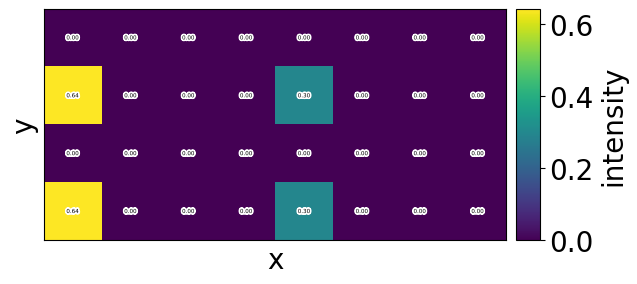

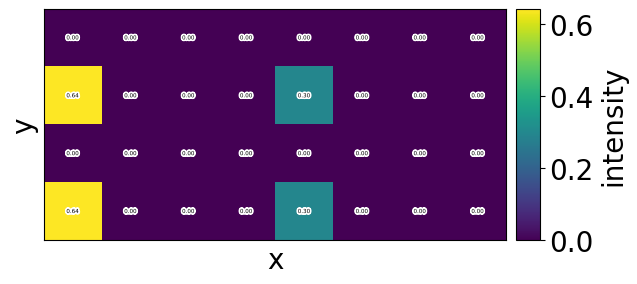

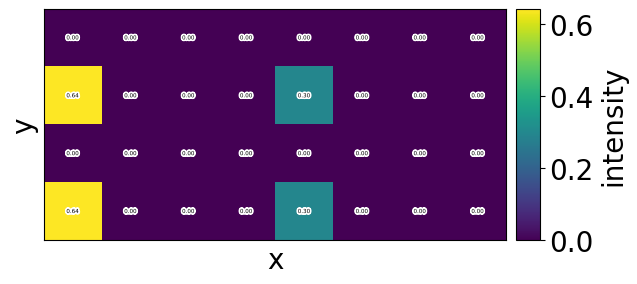

[array([[ 0.64253156+0.j, -0.        +0.j, -0.64253156-0.j,
          0.        +0.j],
        [-0.        -0.j,  0.        +0.j,  0.        +0.j,
         -0.        +0.j],
        [-0.        +0.j,  0.        +0.j,  0.        +0.j,
         -0.        -0.j],
        [-0.        +0.j,  0.        -0.j,  0.        -0.j,
         -0.        +0.j],
        [-0.2952172 -0.j,  0.        +0.j,  0.2952172 +0.j,
         -0.        -0.j],
        [-0.        -0.j,  0.        +0.j,  0.        +0.j,
         -0.        -0.j],
        [-0.        -0.j,  0.        +0.j,  0.        +0.j,
         -0.        -0.j],
        [ 0.        +0.j, -0.        -0.j, -0.        -0.j,
          0.        +0.j]]),
 array([[ 0.64253156+0.j,  0.        +0.j, -0.64253156+0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j

In [4]:
# figure 2 A,B
"""
input_pattern
CeO2_100["A"]+CeO2_100["B"]+CeO2_100["A"]
vacant O layer + upper Ce layer + vacant O layer (1 layer of CeO2(100))
"""
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_100_O      = {"preprocessings":["tile"],\
                    "tile_number"    : [4,2],\
                    "d"             : d_CeO2_100,\
                    "DW"            : DW_CeO2}
XFT_input_100_O  = pp.preprocessing_parser(CeO2_100["A"], order_100_O)
pp.clear(scattering_factor_Ce)
order_100_Ce     = {"preprocessings":["tile"],\
                    "tile_number"    : [4,2],\
                    "d"             : d_CeO2_100,\
                    "DW"            : DW_CeO2}
XFT_input_100_Ce = pp.preprocessing_parser(CeO2_100["B"], order_100_Ce) #,"multiple_scattering_factor"
XFT_input        = pp.normalize(XFT_input_100_O + XFT_input_100_Ce + XFT_input_100_O)
FT([XFT_input,XFT_input,XFT_input])

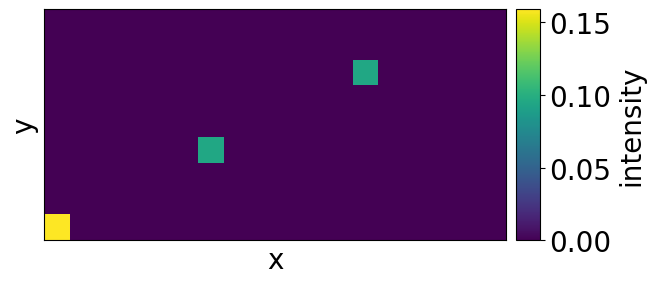

0.5945945945945945


In [4]:
# figure 3 A
"""
input_pattern
CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]
first O layer + first Ce layer + second O layer (1 layer of CeO2(111))
"""
del FT
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_111_Ofirst      = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,3],\
                    "cutoff_length"  :[18,9],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
pp.clear(scattering_factor_Ce)
order_111_Cefirst      = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,3],\
                    "cutoff_length"  :[18,9],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
pp.clear(scattering_factor_Ce)
order_111_Osecond     = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,3],\
                    "cutoff_length"  :[18,9],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
np.fft.fft2(XFT_input)
fontsize = 20
fig, ax = plt.subplots()
ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
ax.tick_params(bottom=False, left=False, right=False, top=False)
image   = ax.imshow(np.abs(np.fft.fft2(XFT_input)/(np.sum(((np.fft.fft2(XFT_input))**2)))).T, origin='lower', cmap="viridis")
xs, ys  = np.meshgrid(range(np.fft.fft2(XFT_input).real.shape[0]),range(np.fft.fft2(XFT_input).real.shape[1]),indexing='ij')
divider = make_axes_locatable(ax)
cax     = divider.append_axes("right",size="5%",pad=0.1)
cbar    = plt.colorbar(image, cax=cax)
cbar.set_label('intensity', size=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel("x", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
plt.clf()
plt.close()
print((np.abs(np.fft.fft2(XFT_input))[6,3])/(np.abs(np.fft.fft2(XFT_input))[0,0]))

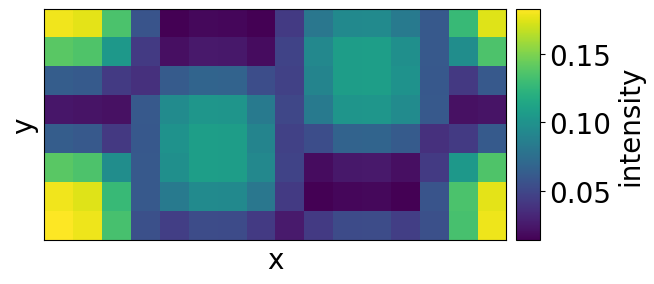

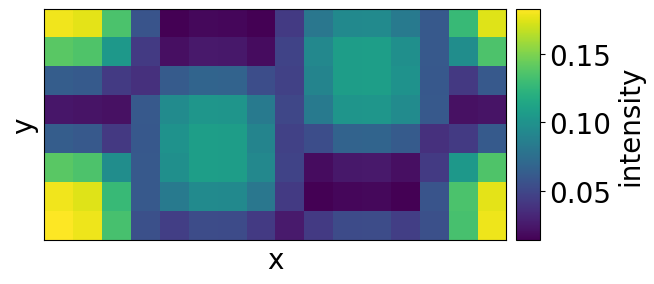

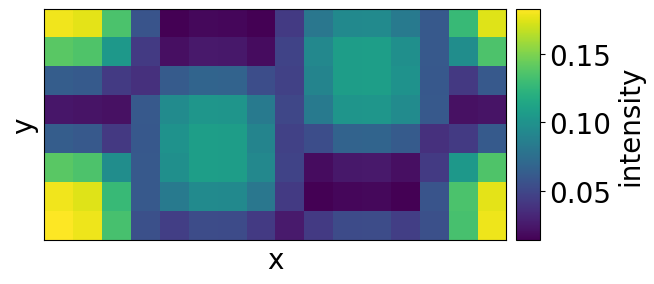

[[ 0.          0.          0.         -0.         -0.         -0.
   0.          0.        ]
 [ 0.          0.00000061  0.00000156 -0.00000699 -0.00011373 -0.00000699
   0.00000156  0.00000061]
 [ 0.          0.00000539  0.00007397 -0.00179034 -0.00099912 -0.00033154
   0.00039946  0.00000539]
 [ 0.          0.00003531  0.0026156  -0.00217088 -0.00654202 -0.01172276
   0.00048437  0.00003531]
 [ 0.          0.00039946  0.0010149  -0.00454864 -0.07402036 -0.00454864
   0.0010149   0.00039946]
 [-0.         -0.00000562 -0.00007716  0.00186731  0.00104207  0.0003458
  -0.00041664 -0.00000562]
 [-0.         -0.00033154 -0.02456267  0.02038636  0.06143493  0.11008637
  -0.00454864 -0.00033154]
 [-0.         -0.00422028 -0.01072228  0.04805572  0.78201381  0.04805572
  -0.01072228 -0.00422028]
 [-0.         -0.00099912 -0.01370747  0.33174864  0.18513605  0.06143493
  -0.07402036 -0.00099912]
 [-0.         -0.00078153 -0.0579003   0.04805572  0.14481737  0.25950087
  -0.01072228 -0.00078153]

In [5]:
#figure 3 B
"""
input_pattern
CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]  
first O layer + first Ce layer + second O layer(1 layer of CeO2(111))
"""
del FT
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_111_Ofirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [6,4],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[16,8],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
pp.clear(scattering_factor_Ce)
order_111_Cefirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [6,4],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[16,8],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_order_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
pp.clear(scattering_factor_Ce)
order_111_Osecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [6,4],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[16,8],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_order_111_Cefirst+ XFT_input_111_Osecond)
DFT,FFT,QFT_1              = FT([XFT_input,XFT_input,XFT_input])
print(XFT_input  )
print(QFT_1)

cutoff


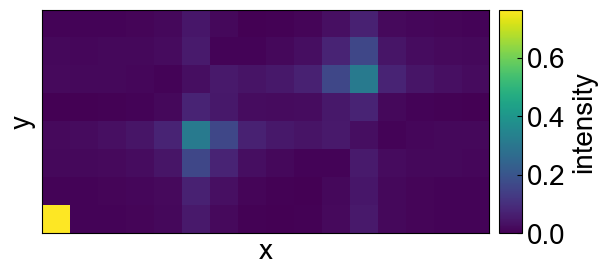

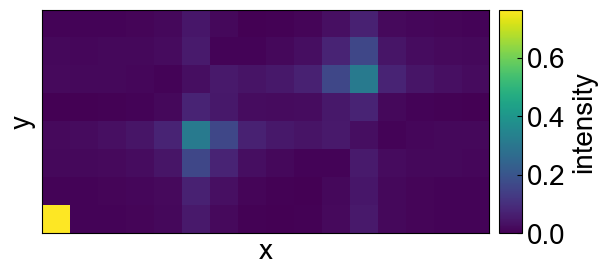

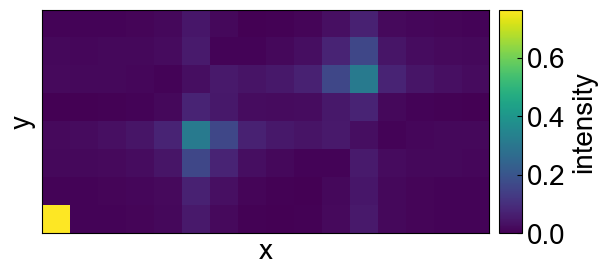

cutoff


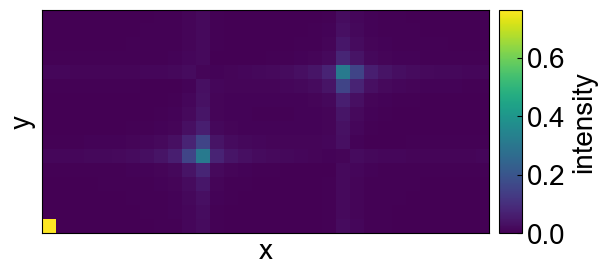

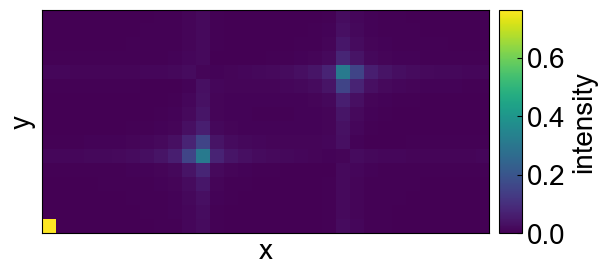

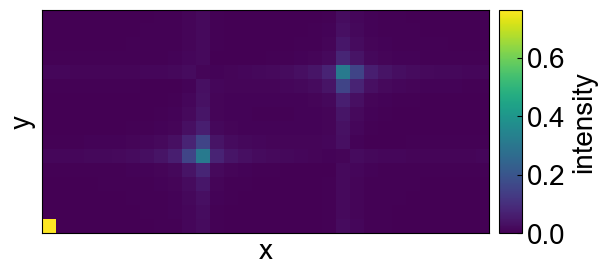

cutoff


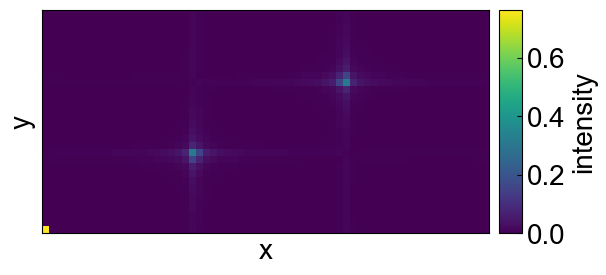

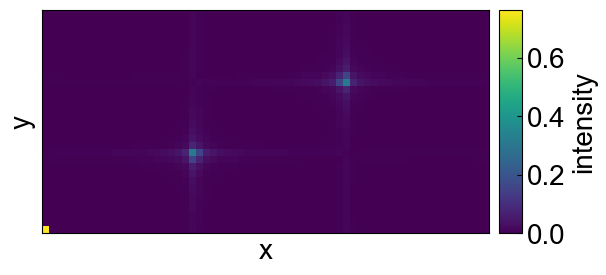

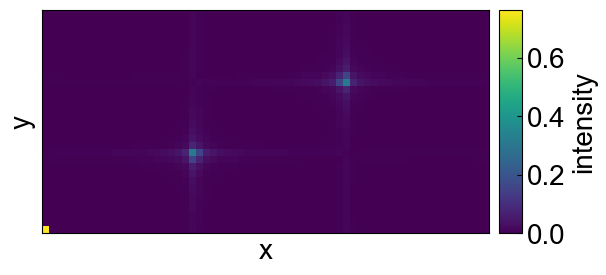

cutoff


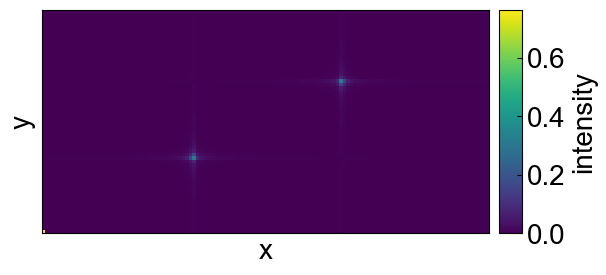

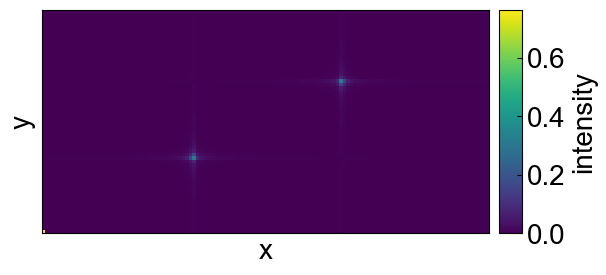

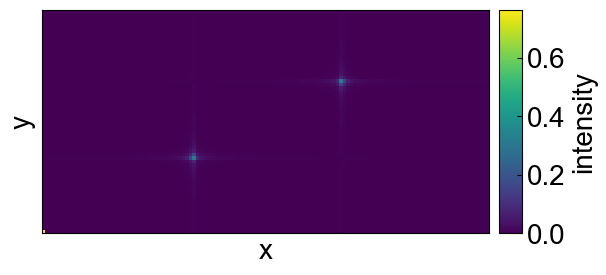

cutoff


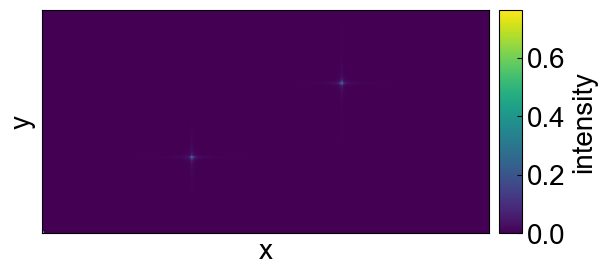

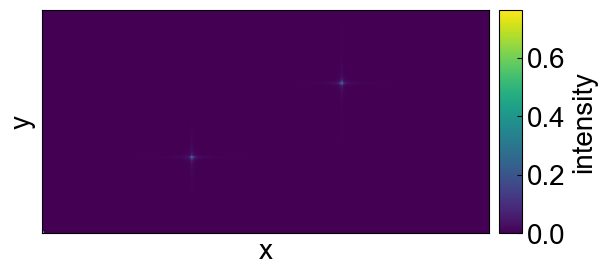

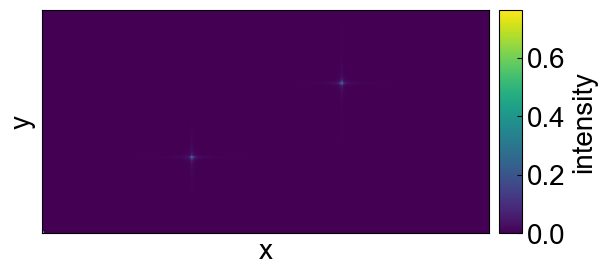

cutoff


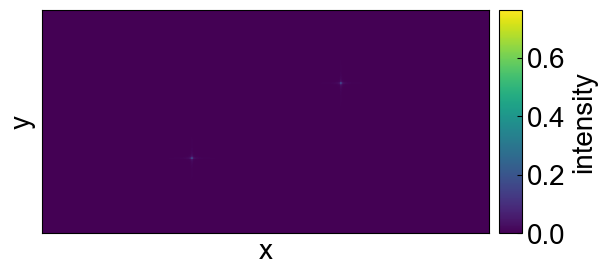

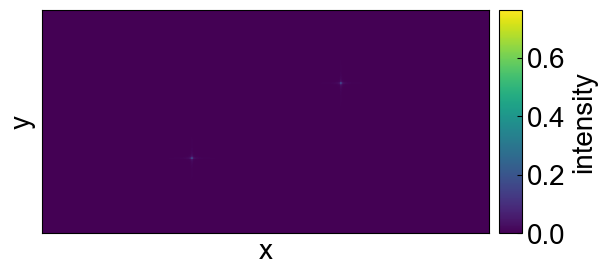

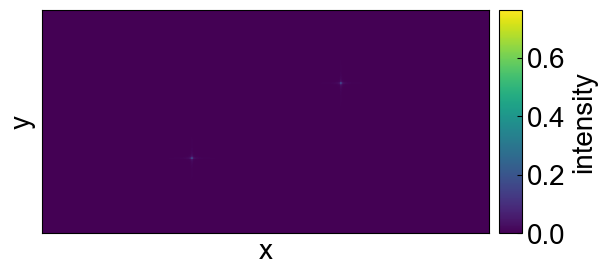

cutoff


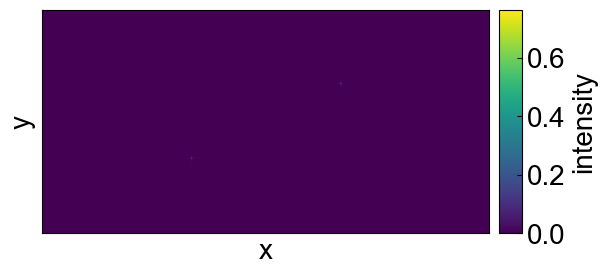

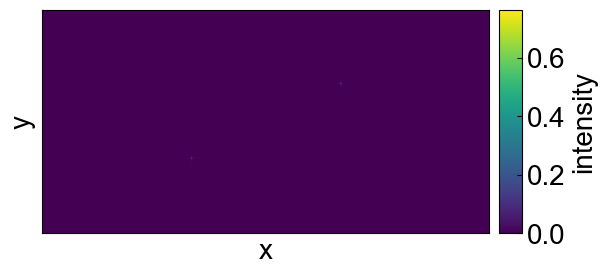

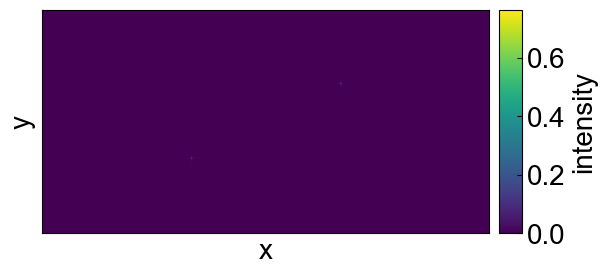

In [12]:
#for figure 4 A #cutoff with no flat top function with changing bit number 

"""
input_pattern
CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]
O layer + upper Ce layer + O layer (1 layer of CeO2(111))
"""
del FT
FT = FTManager()
relative_intensity_cutoff_no_flat_top_function       = []
for bit_number in range (3,10):
    del FT,pp
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    pp.clear(scattering_factor_O)
    order_111_Othird     = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Othird = pp.preprocessing_parser(CeO2_111["D"], order_111_Othird)
    pp.clear(scattering_factor_O)
    order_111_Cedowner     = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cedowner = pp.preprocessing_parser(CeO2_111["E"], order_111_Cedowner)
    print("cutoff")
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_cutoff_no_flat_top_function.append([QFT[((2**(bit_number+1))//3),((2**(bit_number))//3)]/QFT[0,0]])

padding


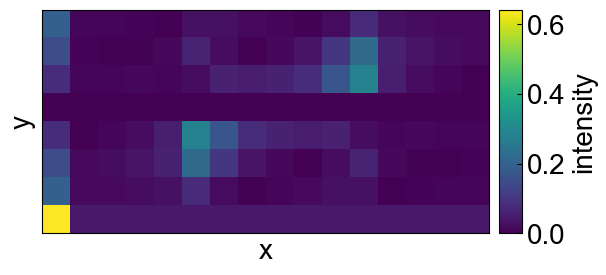

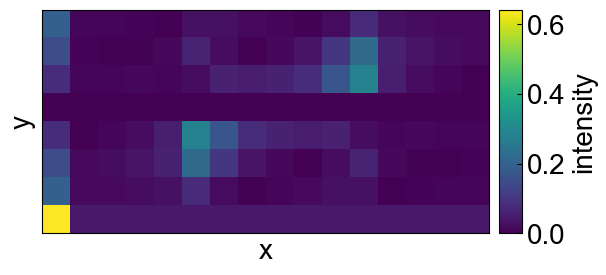

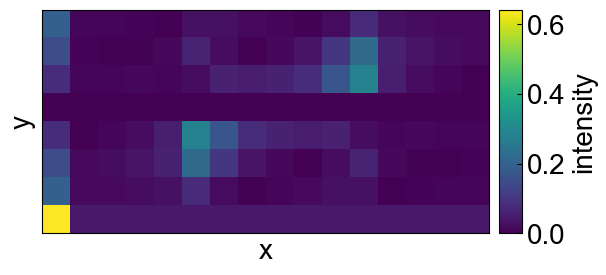

padding


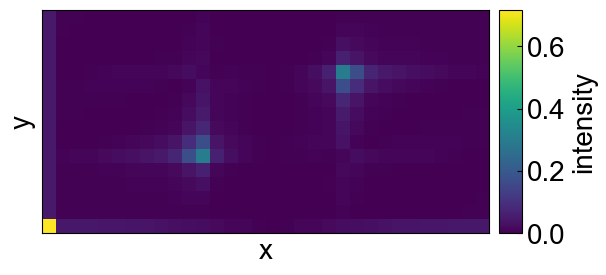

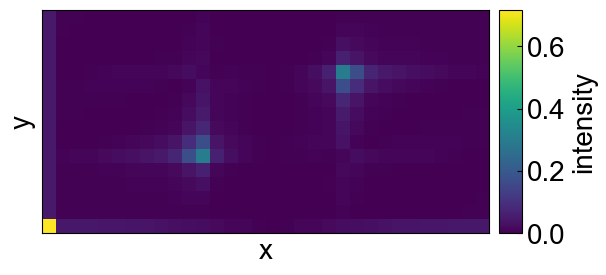

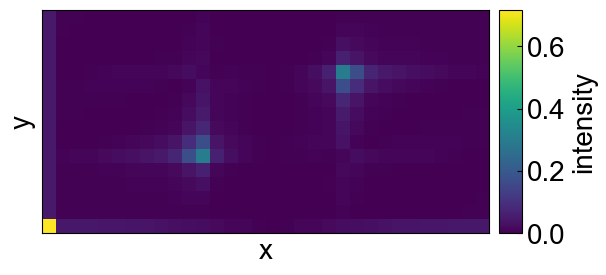

padding


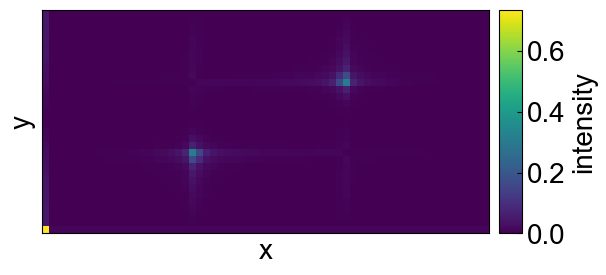

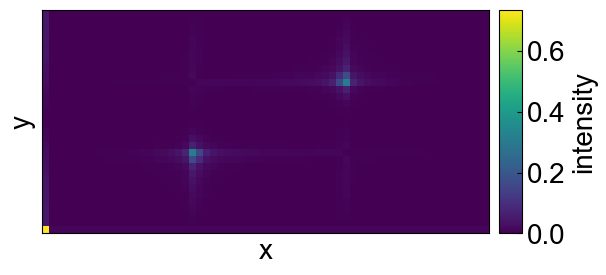

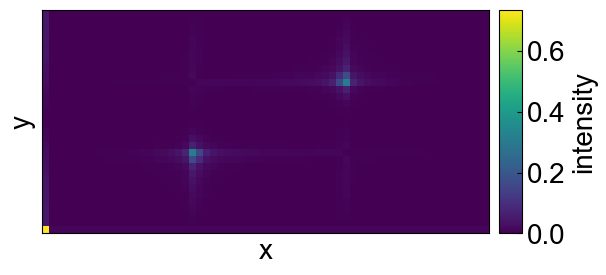

padding


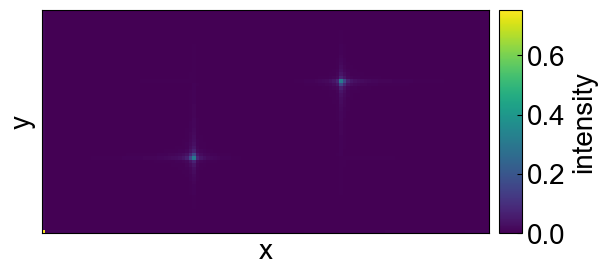

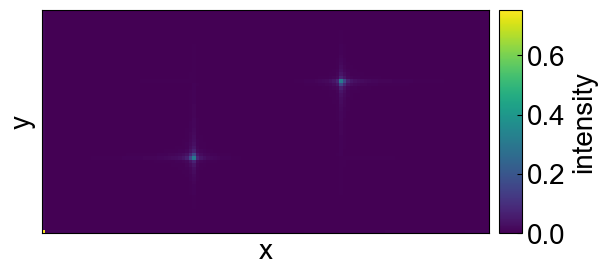

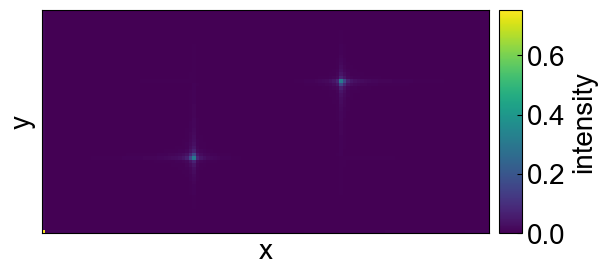

padding


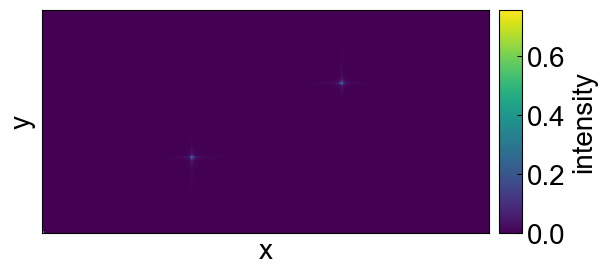

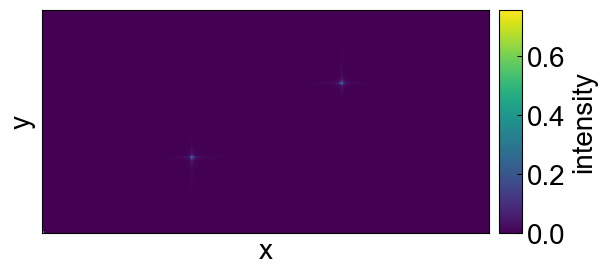

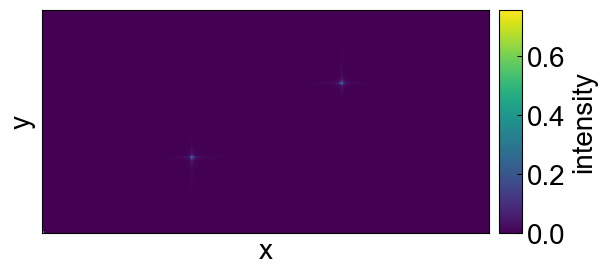

padding


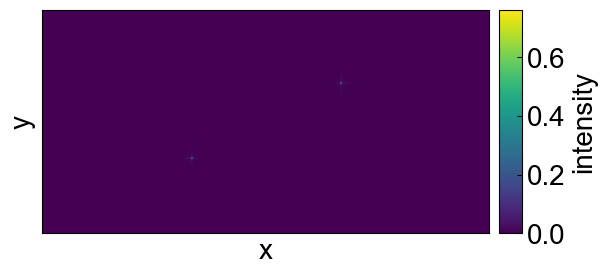

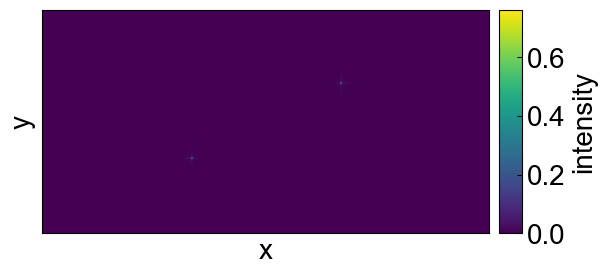

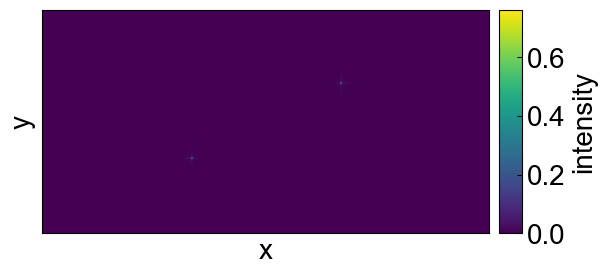

padding


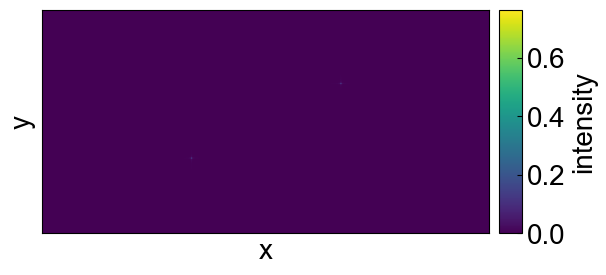

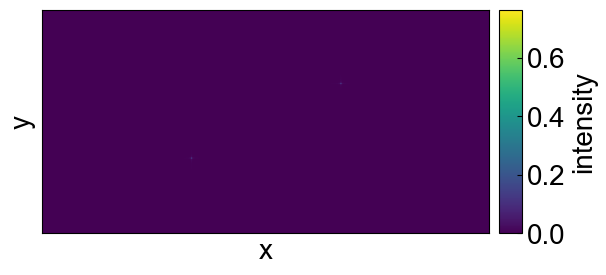

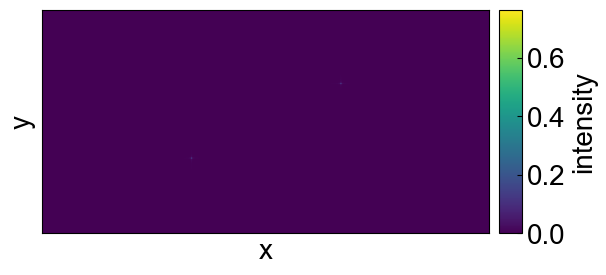

In [11]:
#for figure 4 A  #Zeropadding with no flat_top function with changing bit number 
relative_intensity_padding_no_flat_top       = []
del FT
FT = FTManager()
for bit_number in range (3,10):
    del FT
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","padding"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","padding"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","padding"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    print("padding")
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_padding_no_flat_top.append([QFT[((2**(bit_number+1))//3),((2**(bit_number))//3)]/QFT[0,0]])

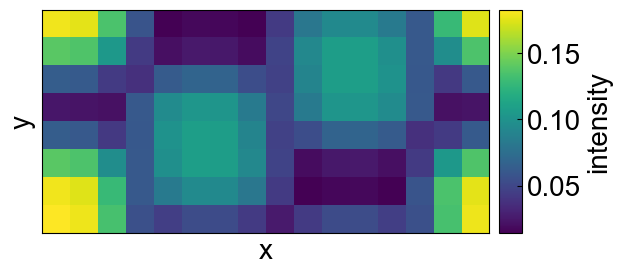

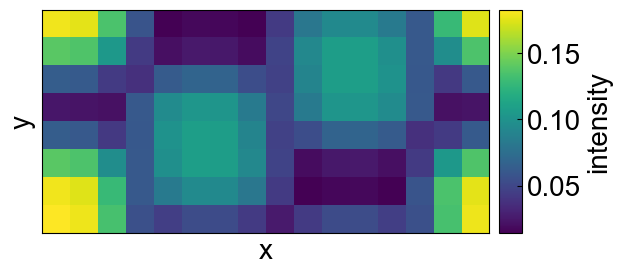

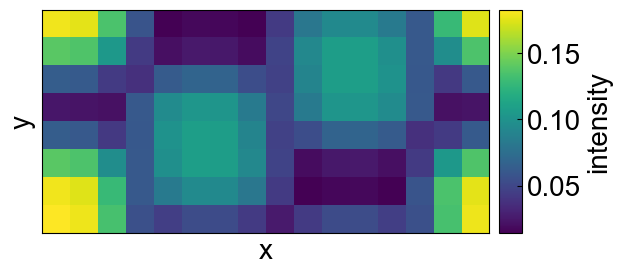

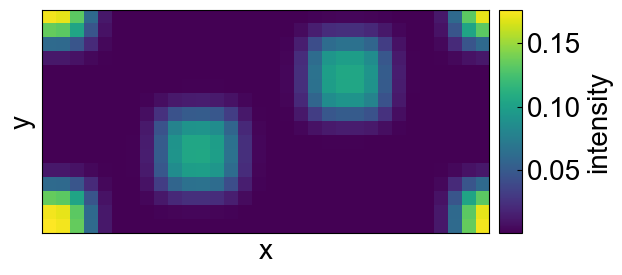

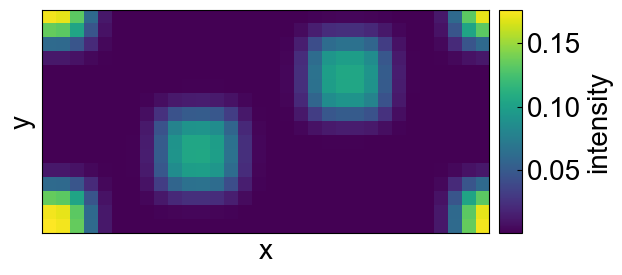

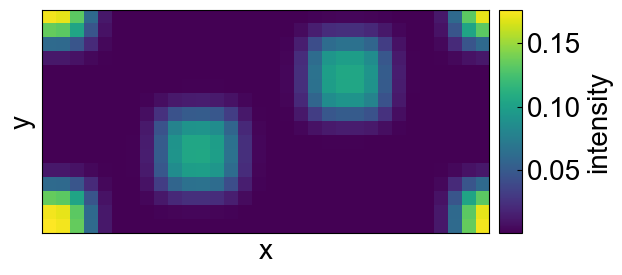

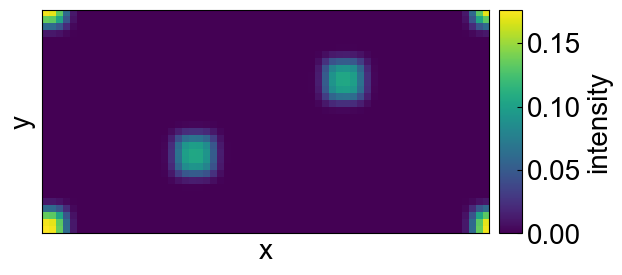

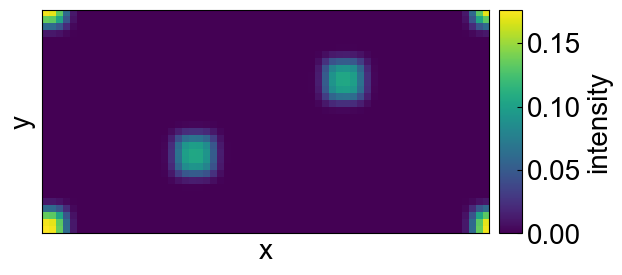

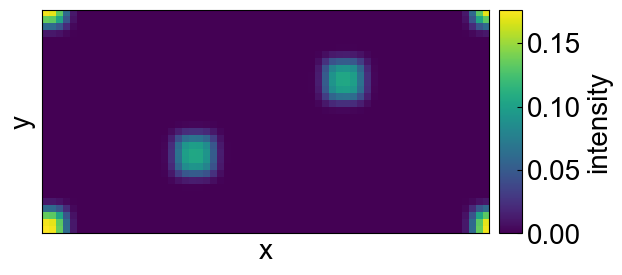

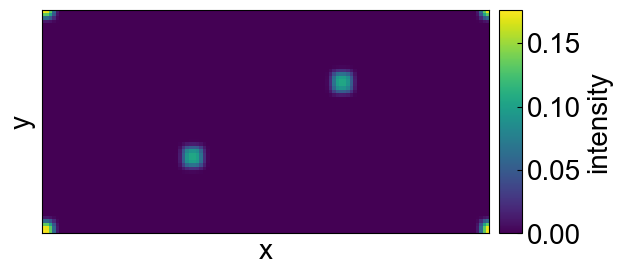

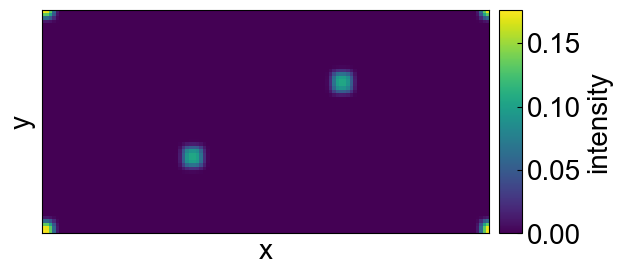

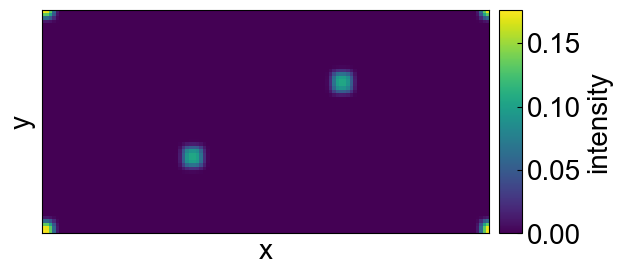

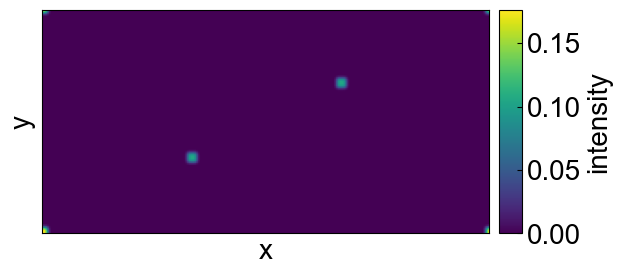

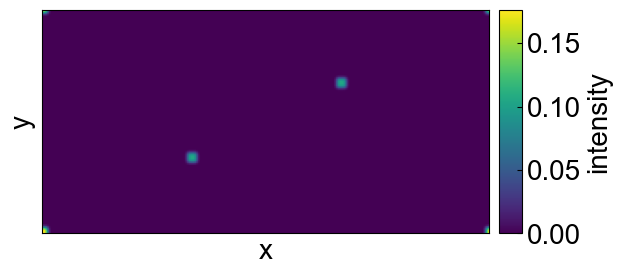

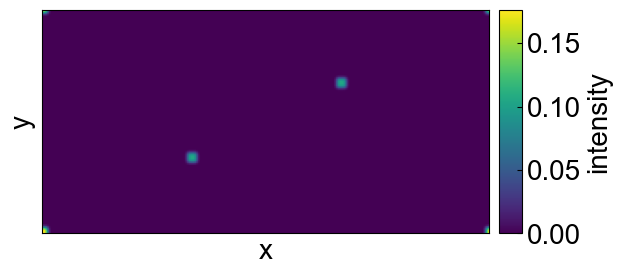

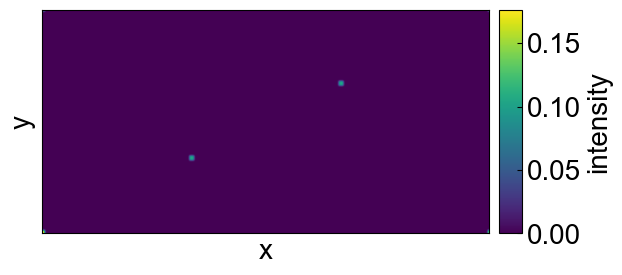

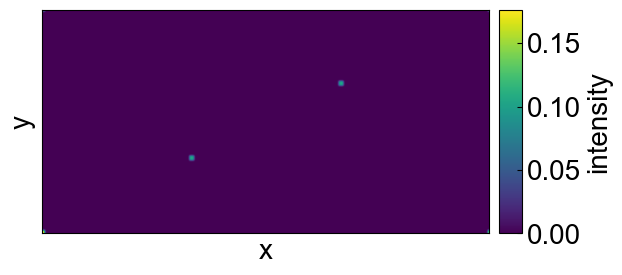

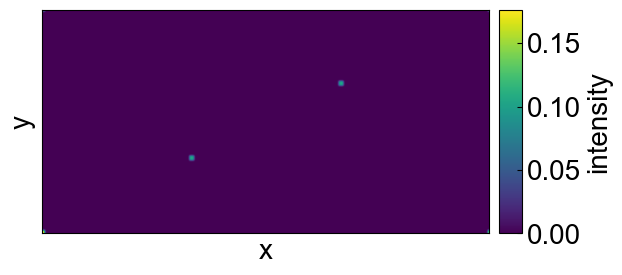

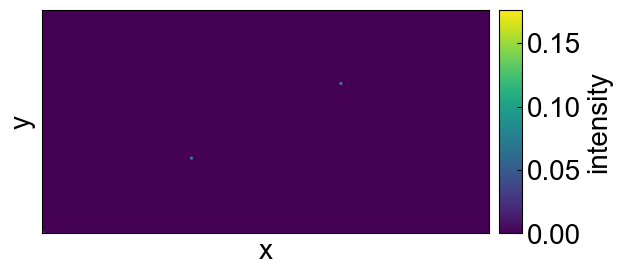

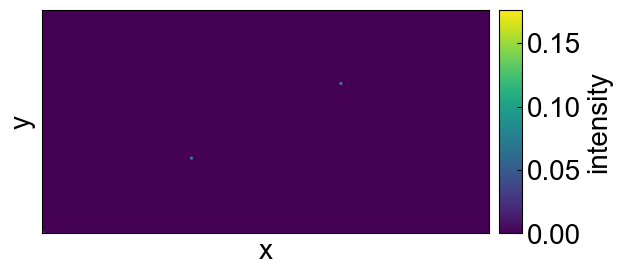

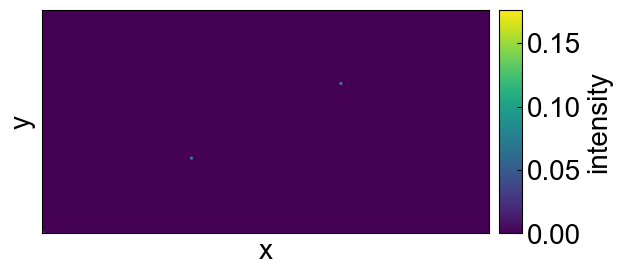

In [9]:
#for figure 4 A, B #cutoff with flat_top function with changing bit number 

"""
input_pattern
first_layer (CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]) +second layer (CeO2_111["D"]+CeO2_111["E"]+CeO2_111["A"])
+third layer (CeO2_111["B"]+CeO2_111["F"]+CeO2_111["C"])
first O layer + second layer + third layer (changing layer of CeO2(111))
"""
del FT
FT = FTManager()
relative_intensity_cutoff_with_flat_top_function       = []
for bit_number in range (3,10):
    del FT
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_cutoff_with_flat_top_function.append([QFT[((2**(bit_number+1))//3),((2**(bit_number))//3)]/QFT[0,0]])

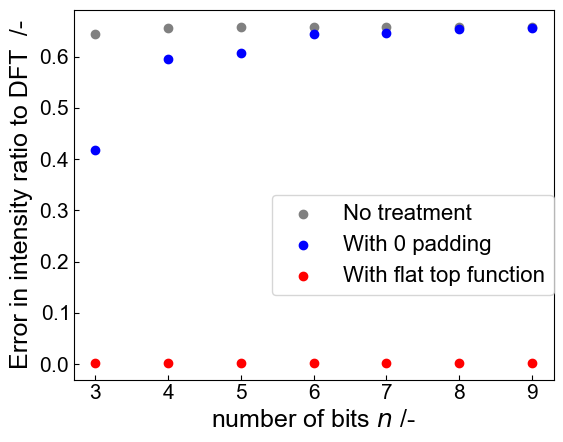

In [14]:
#Figure 4 A comparing cutoff with no and flat top function and padding with no flat top function
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
x =  np.array(range(3, 10))
y_1 = np.abs(1-np.abs(relative_intensity_cutoff_no_flat_top_function)/0.5945945945945945)
y_2 = np.abs(1-(np.abs(relative_intensity_padding_no_flat_top)/0.5945945945945945))
y_3 = np.abs(1-(np.abs(relative_intensity_cutoff_with_flat_top_function)/0.5945945945945945))

plt.rcParams['font.family'] ='Arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.scatter(x, y_1, c= 'gray')
plt.scatter(x, y_2, c= 'blue')
plt.scatter(x, y_3, c= 'red')

plt.xlabel("number of bits $\it{ n }$ /-", fontname = 'Arial',fontsize = 18)
plt.ylabel("Error in intensity ratio to DFT  /-", fontname = 'Arial',fontsize = 18)
plt.legend(["No treatment","With 0 padding","With flat top function"],bbox_to_anchor=(1, 0.5),loc='upper right',borderaxespad=0,fontsize = 16) 
plt.tick_params(labelsize=15)
plt.subplot().yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
plt.subplot().yaxis.offsetText.set_fontsize(16)
plt.savefig(fname = "Fig4A_ver2.svg",transparent = True)
plt.show()


padding


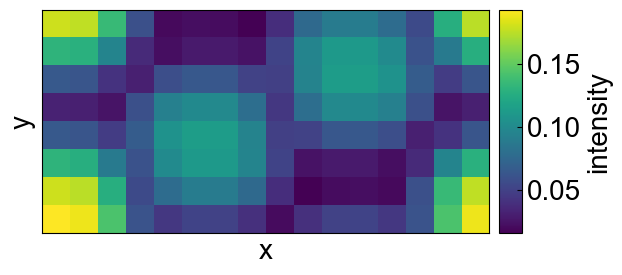

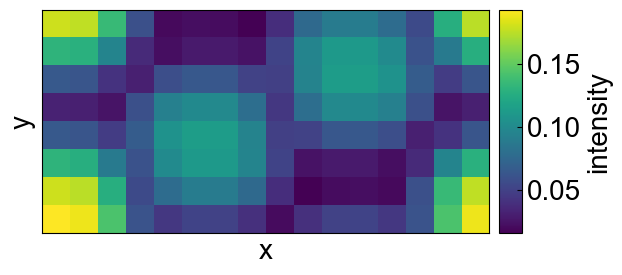

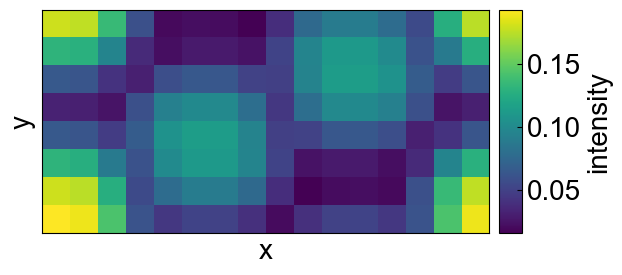

padding


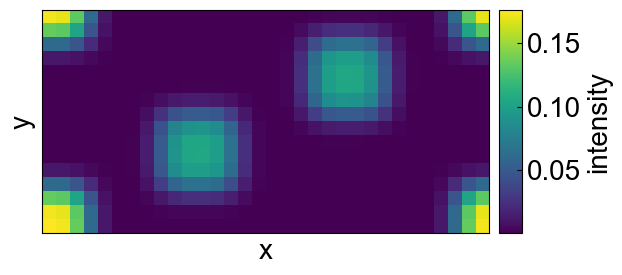

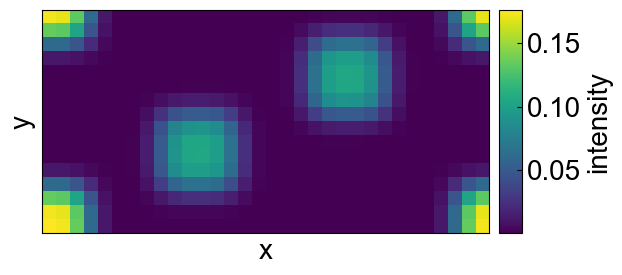

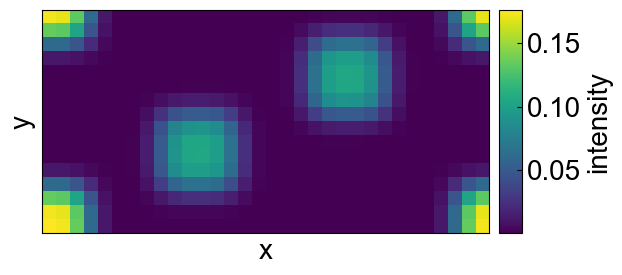

padding


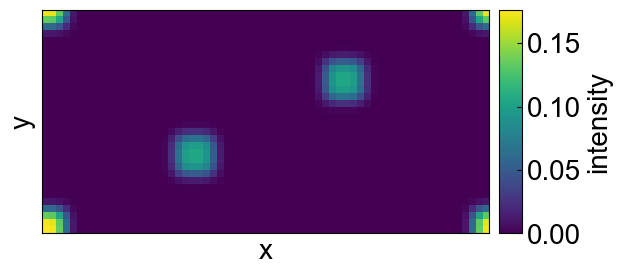

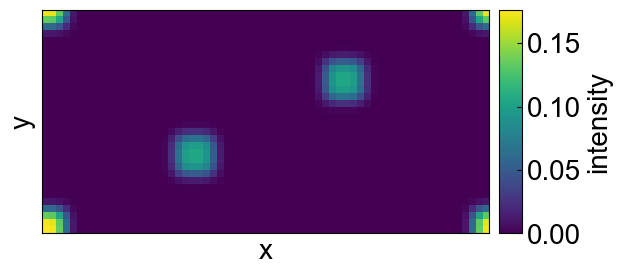

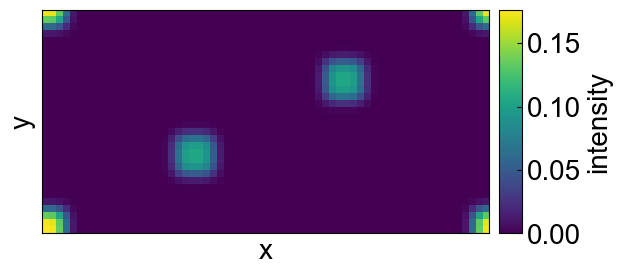

padding


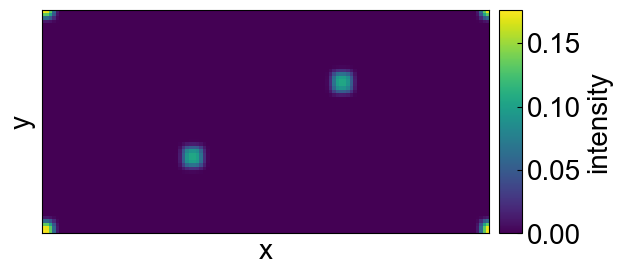

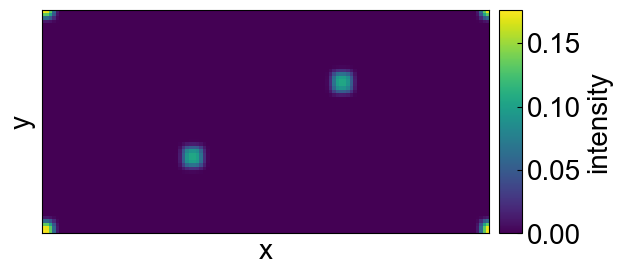

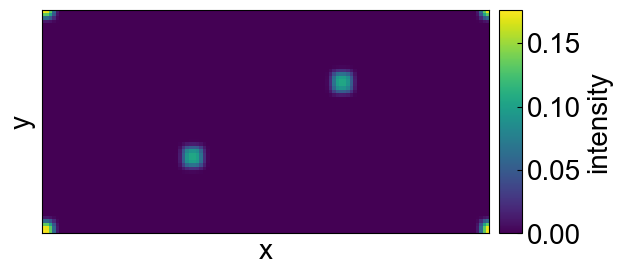

padding


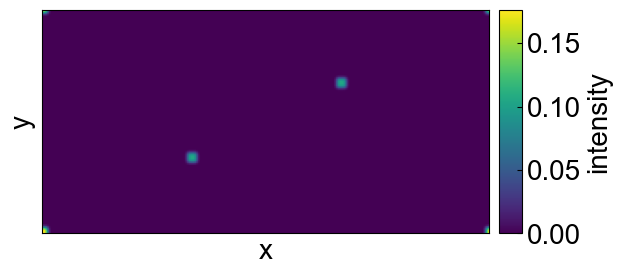

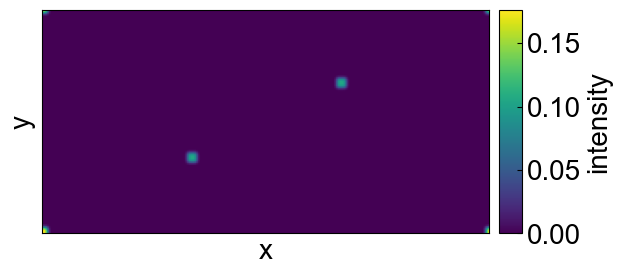

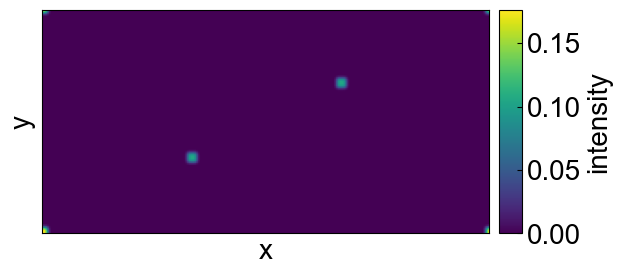

padding


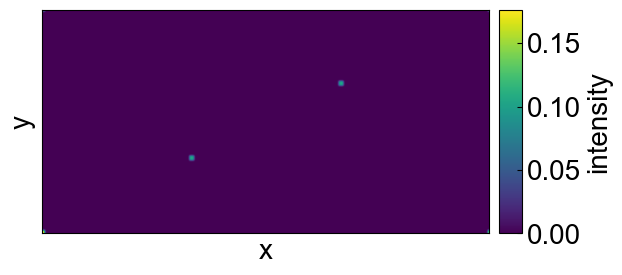

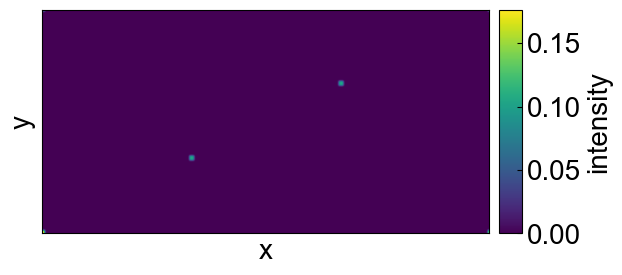

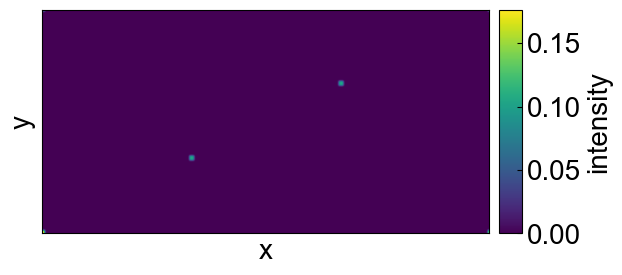

padding


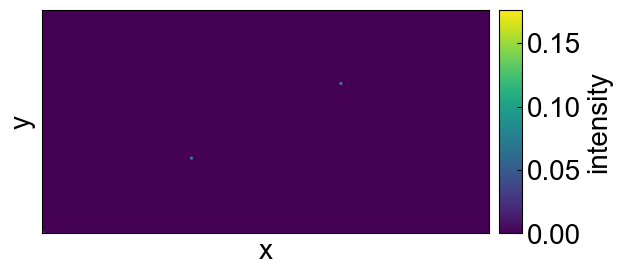

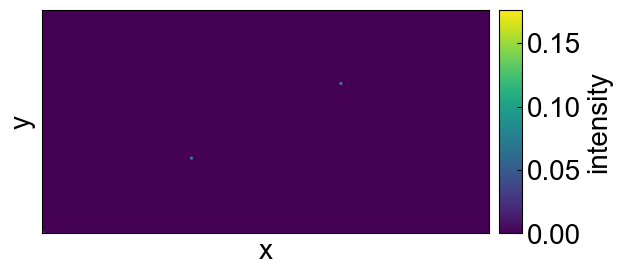

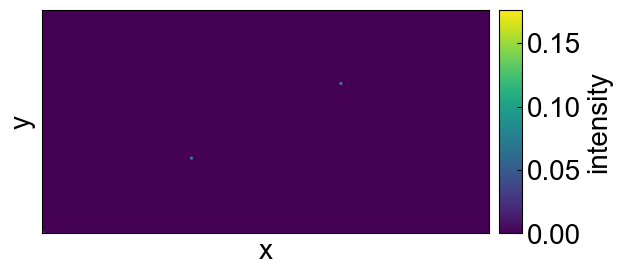

In [8]:
#for Figure 4 B Zeropadding with flat_top function with changing bit number 3-9
relative_intensity_padding_with_flat_top_function       = []
for bit_number in range (3,10):
    del FT
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","padding","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","padding","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","padding","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    print("padding")
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_padding_with_flat_top_function.append([QFT[((2**(bit_number+1))//3),((2**(bit_number))//3)]/QFT[0,0]])

[[0.0027451 ]
 [0.00238645]
 [0.0023864 ]
 [0.0023864 ]
 [0.0023864 ]
 [0.0023864 ]
 [0.0023864 ]] [[0.02836873]
 [0.00242536]
 [0.00241058]
 [0.0023864 ]
 [0.0023864 ]
 [0.0023864 ]
 [0.0023864 ]]


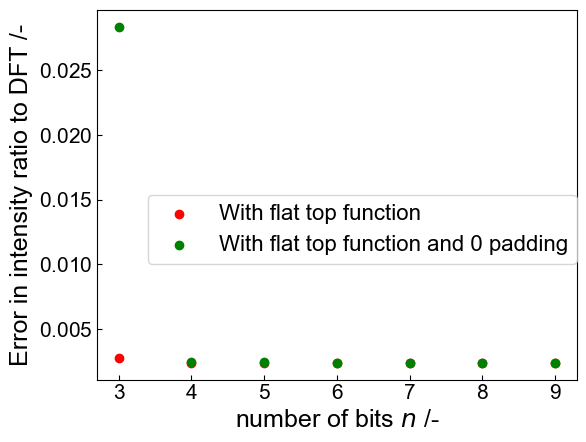

In [10]:
#Figure 4 B comparing cutoff with flat top function and padding with no flat top function
x =  np.array(range(3, 10))
y_1 = (np.abs(1-(np.abs(relative_intensity_cutoff_with_flat_top_function)/0.5945945945945945)))
y_2 = (np.abs(1-(np.abs(relative_intensity_padding_with_flat_top_function)/0.5945945945945945)))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.family'] ='Arial'
plt.rcParams['figure.subplot.left'] = 0.15

plt.scatter(x, y_1, c= 'red')
plt.scatter(x, y_2, c= 'green')

plt.xlabel("number of bits $\it{ n }$ /-", fontname = 'Arial',fontsize = 18)
plt.ylabel("Error in intensity ratio to DFT /-", fontname = 'Arial',fontsize = 18)
plt.legend(["With flat top function", "With flat top function and 0 padding"],bbox_to_anchor=(1, 0.5),loc='upper right',borderaxespad=0,fontsize = 16)
plt.subplot().yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
plt.subplot().yaxis.offsetText.set_fontsize(16)
plt.tick_params(labelsize=15)
plt.savefig(fname = "Fig4B_ver2.svg",transparent = True)
plt.show()

## SI Figures ##

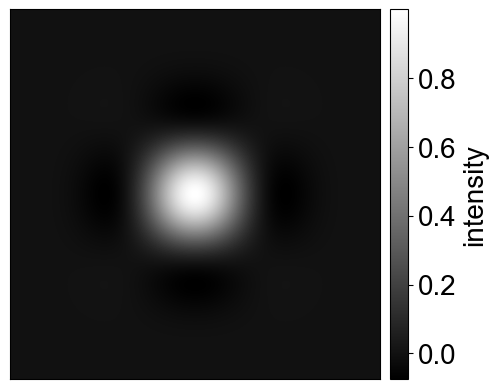

In [106]:
#Figure SI 2 A
XFTinput = np.array([[0,0],[0,0]])
tile_number=[512,512]
XFTinput =np.tile(XFTinput, tuple(tile_number))
coefficients_window            = np.array([0.1881,0.36923,0.28702,0.13077,0.02488])
x_grid,y_grid = np.meshgrid(np.arange(XFTinput.shape[1]),np.arange(XFTinput.shape[0]))
x_window      = np.sum(((-1)**np.arange(5)*coefficients_window)[np.newaxis,np.newaxis,:]*np.cos(2*np.pi/(XFTinput.shape[1]-1)*np.arange(5)*np.repeat(x_grid[:,:,np.newaxis],5,axis=2)),axis=2)
y_window      = np.sum(((-1)**np.arange(5)*coefficients_window)[np.newaxis,np.newaxis,:]*np.cos(2*np.pi/(XFTinput.shape[0]-1)*np.arange(5)*np.repeat(y_grid[:,:,np.newaxis],5,axis=2)),axis=2)
window   = y_window * x_window
fontsize =20
fig, ax = plt.subplots()
ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
ax.tick_params(bottom=False, left=False, right=False, top=False)
image   = ax.imshow(window, origin='lower', cmap="gray")
xs, ys  = np.meshgrid((window.real.shape[0]),range(window.real.shape[1]),indexing='ij')
divider = make_axes_locatable(ax)
cax     = divider.append_axes("right",size="5%",pad=0.1)
cbar    = plt.colorbar(image, cax=cax)
cbar.set_label('intensity', size=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig(fname = "Fig S2_ver1.svg",transparent = True)
plt.show()
plt.clf()
plt.close()

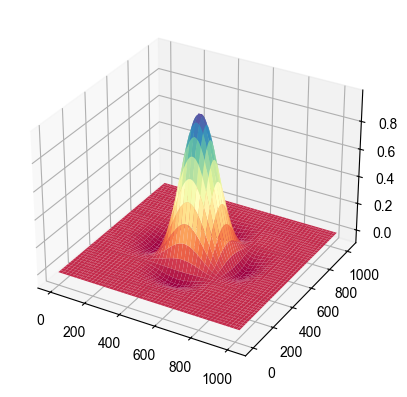

In [105]:
#Figure SI 2 B
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = y = np.arange(0, 1024, 1)
X, Y = np.meshgrid(x, y)
z = window 
ax.plot_surface(X,Y,z, cmap='Spectral')
plt.savefig(fname = "Fig S2_2_ver1.svg",transparent = True)
plt.show()

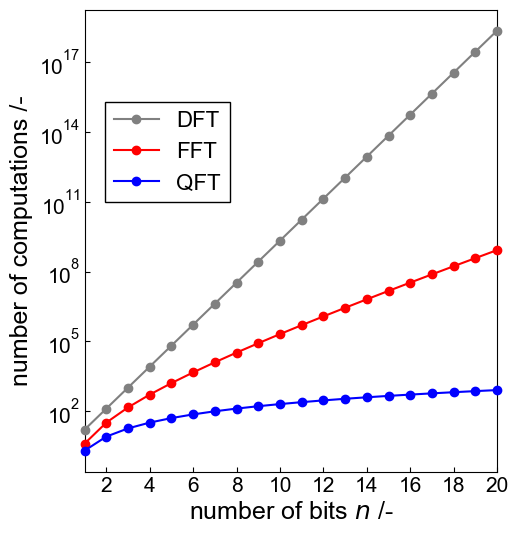

In [25]:
#Figure SI 5
x =  np.array(range(1, 21,1))
y_1 = []
for n in range(1,21):
    y_1.append(2**(n*3+1))
y_2 = np.array(2**(x+1)*(x**2))
y_3 = np.array(2*(x**2))
plt.rcParams['font.family'] ='Arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.figure(figsize=(5.5,6))
plt.plot(x, y_1,marker="o",clip_on=False,zorder = 3, c= 'gray')
plt.plot(x, y_2, marker="o",clip_on=False,zorder = 3,c= 'red')
plt.plot(x, y_3, marker="o",clip_on=False,zorder = 3,c= 'blue')
ax = plt.gca()
ax.set_yscale('log')
plt.xlim(1, 20)
plt.xticks(np.arange(2, 21, 2))
plt.xlabel("number of bits $\it{ n }$ /-", fontname = 'Arial',fontsize = 18)
plt.ylabel("number of computations /-", fontname = 'Arial',fontsize = 18)
plt.legend(["DFT", "FFT", "QFT"],bbox_to_anchor=(0.05, 0.8),loc='upper left',borderaxespad=0,fontsize = 16,edgecolor="black",framealpha = 1,fancybox =False)
plt.tick_params(labelsize=15)
plt.savefig(fname = "FigS5_ver2.svg",transparent = True)
plt.show()

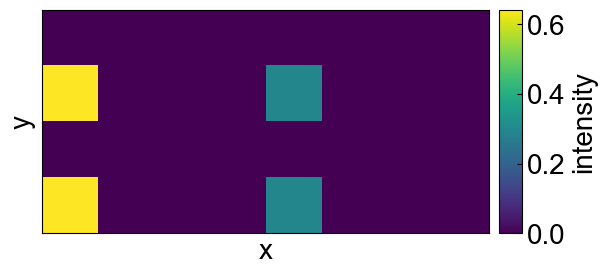

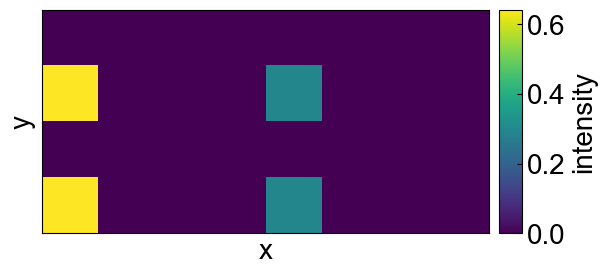

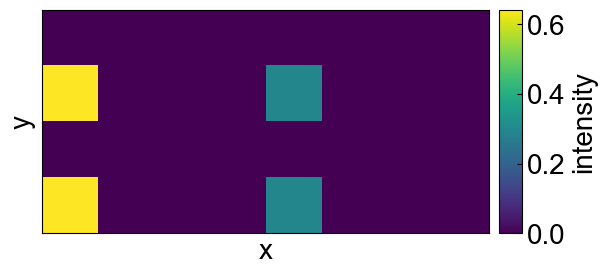

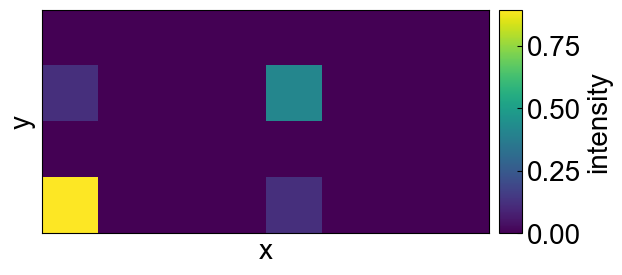

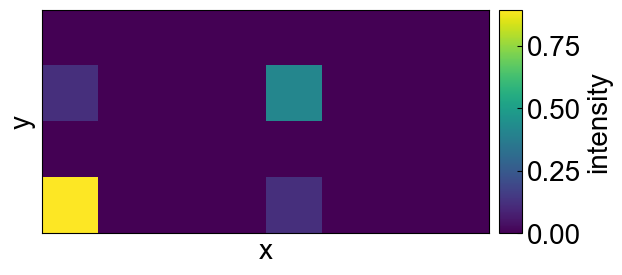

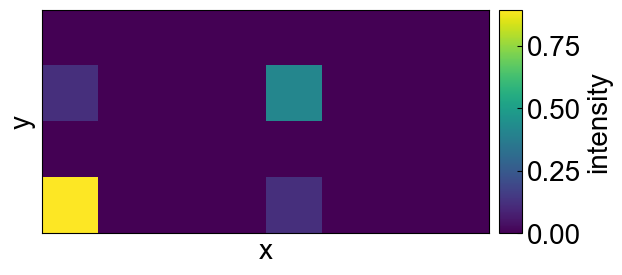

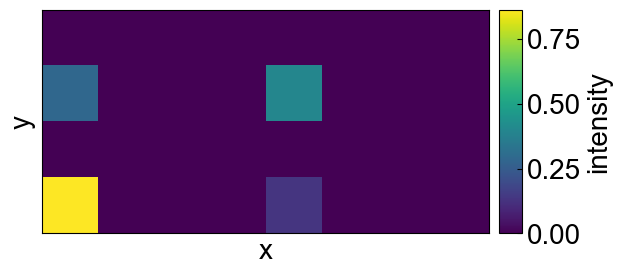

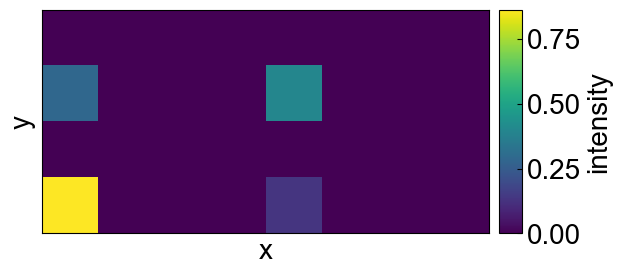

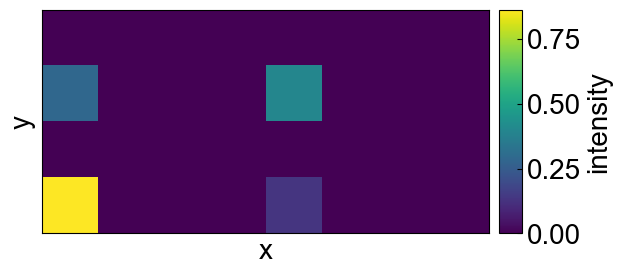

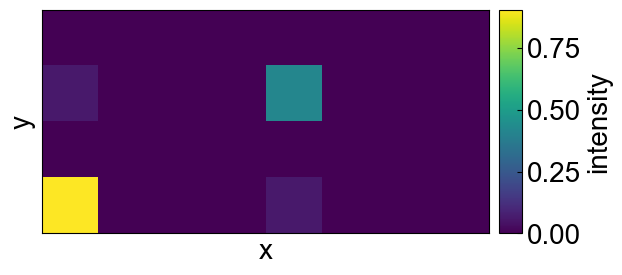

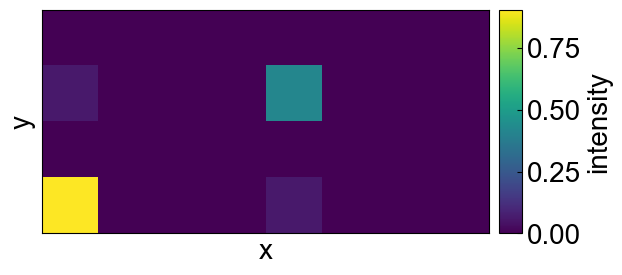

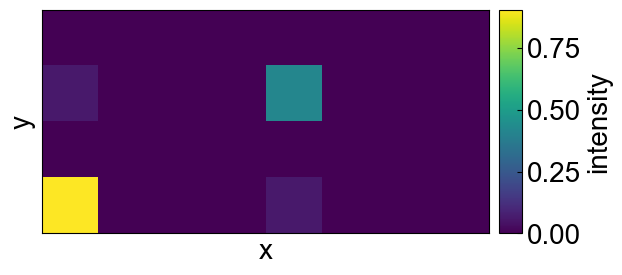

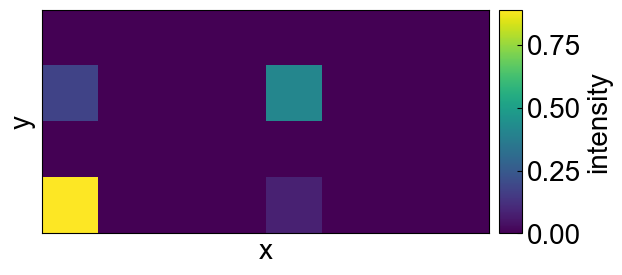

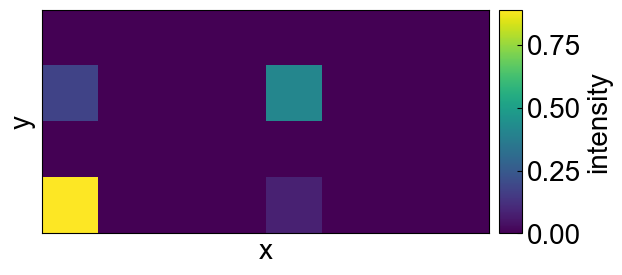

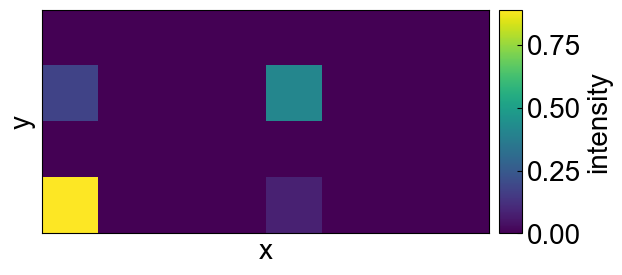

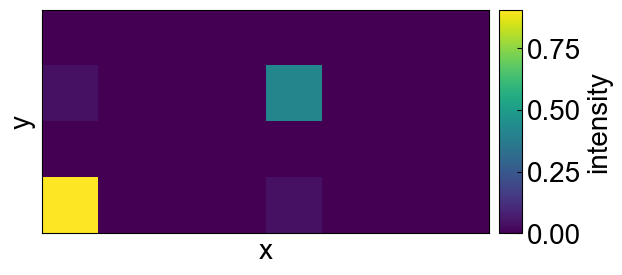

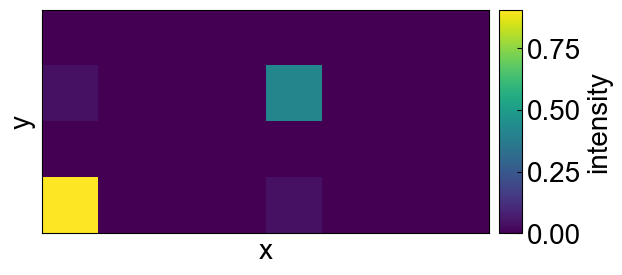

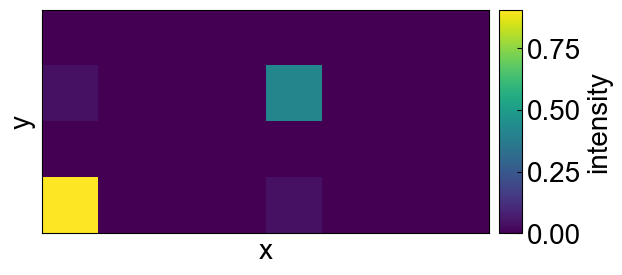

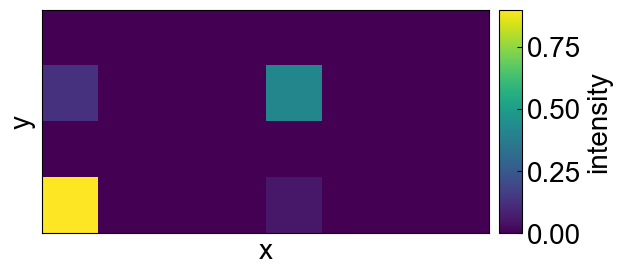

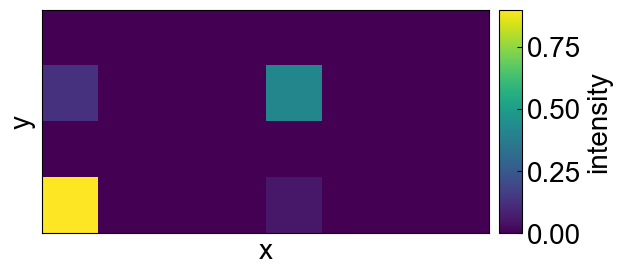

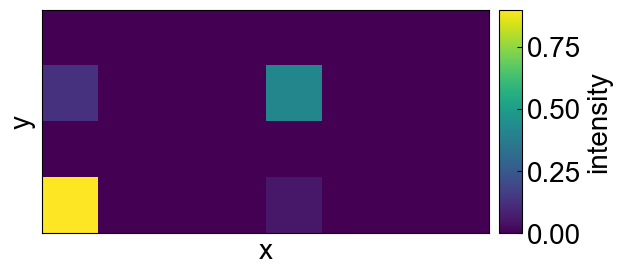

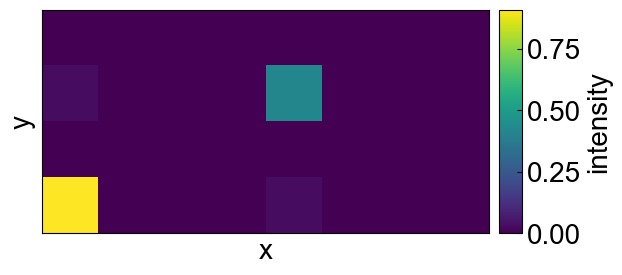

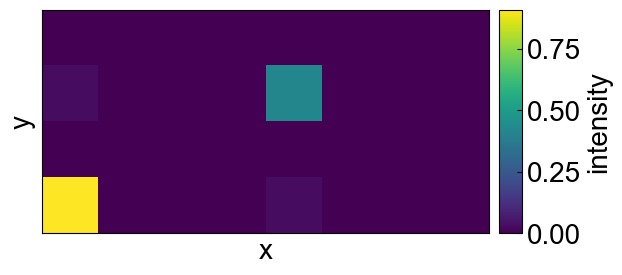

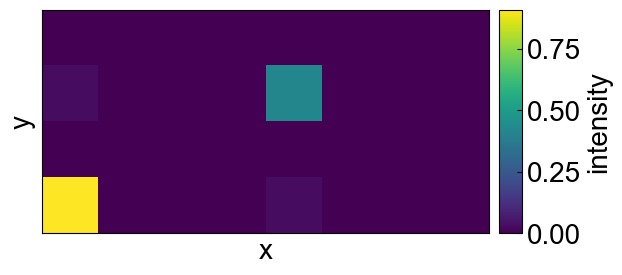

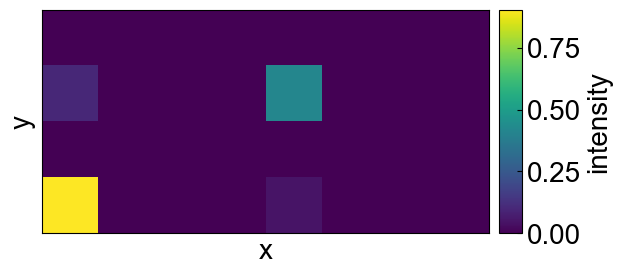

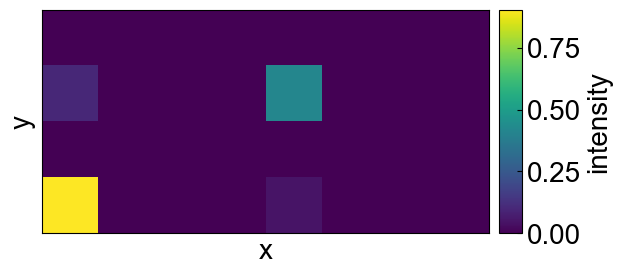

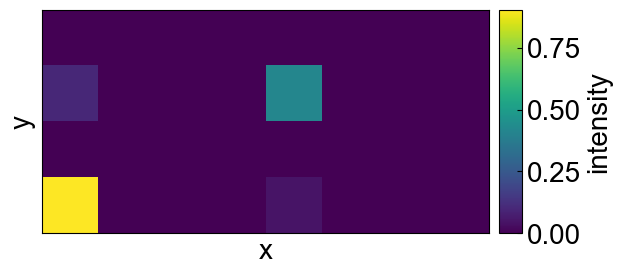

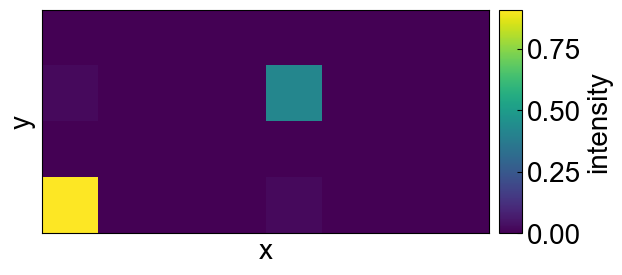

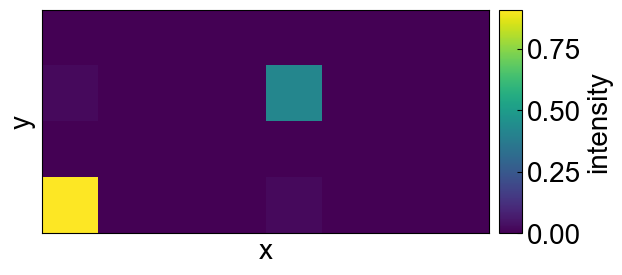

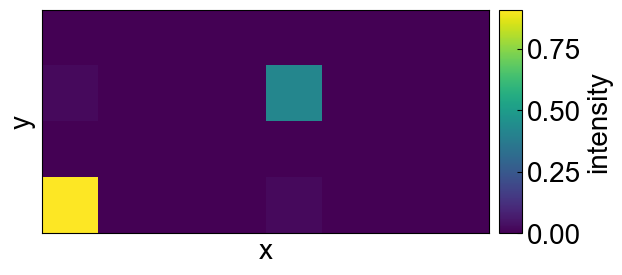

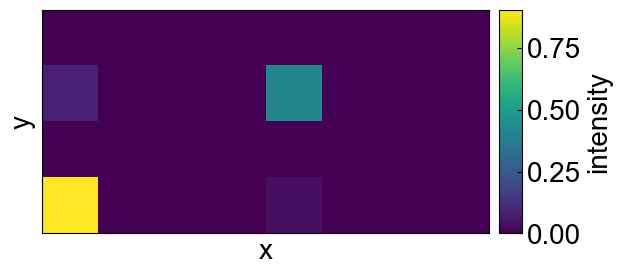

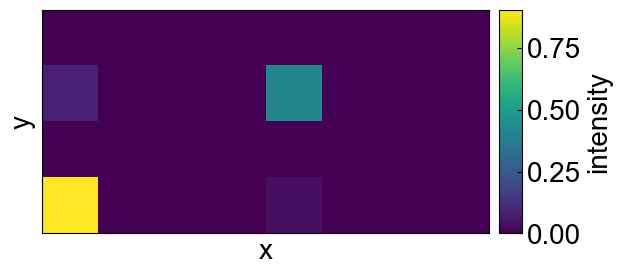

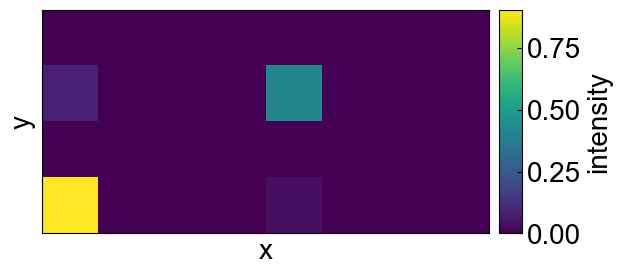

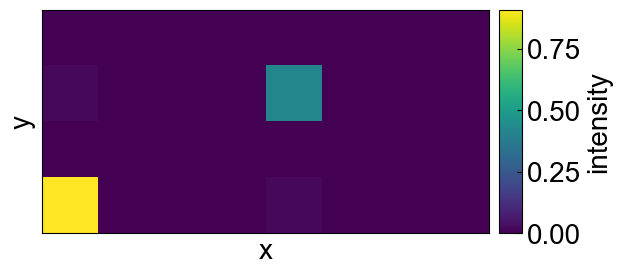

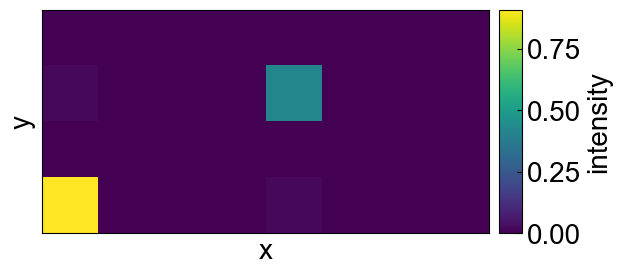

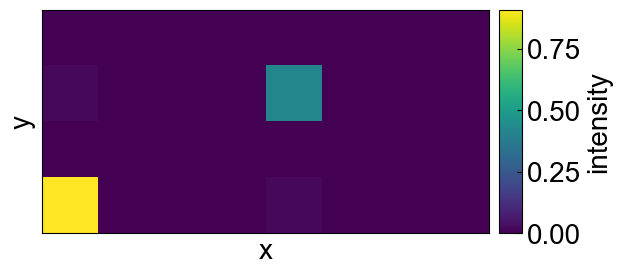

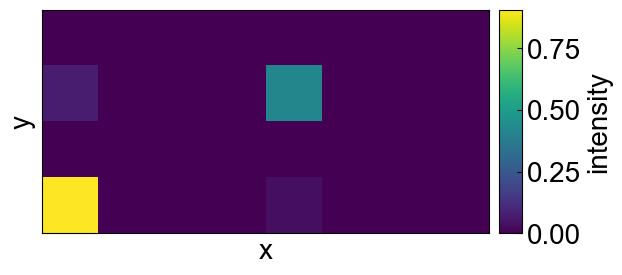

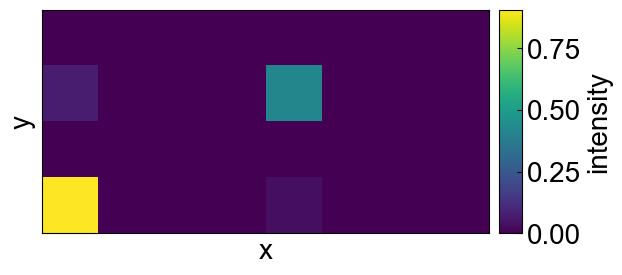

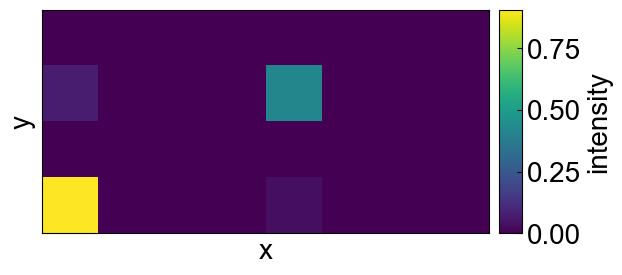

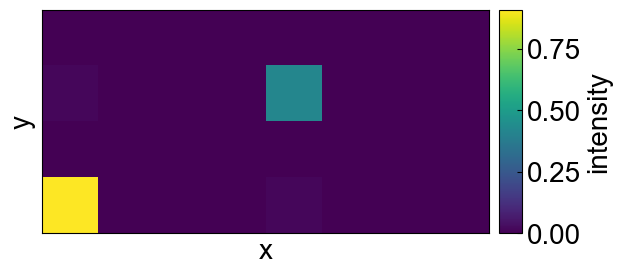

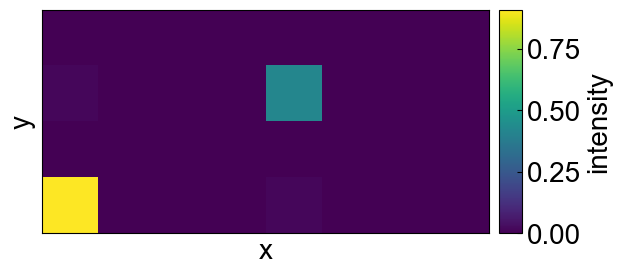

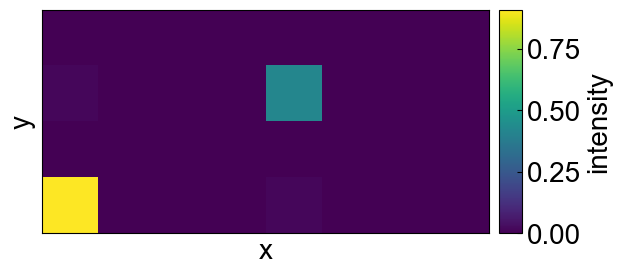

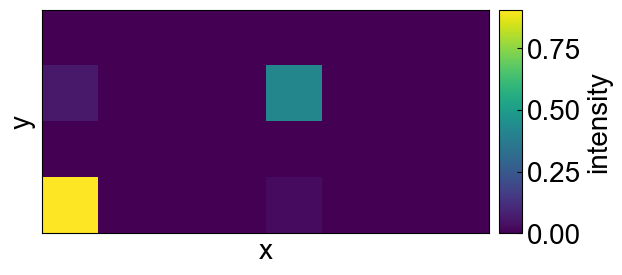

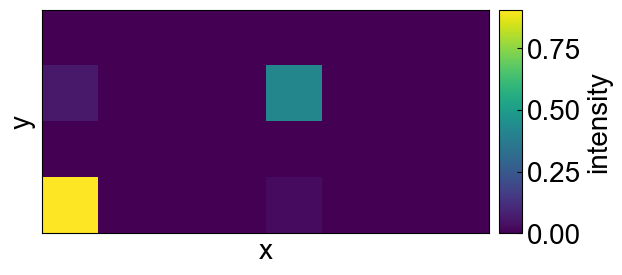

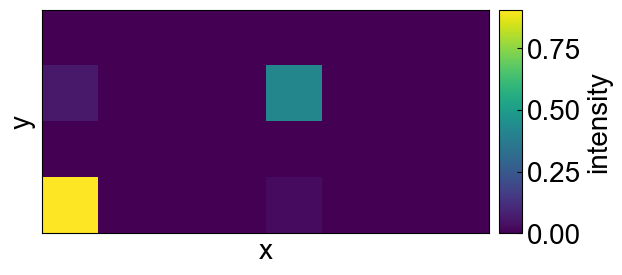

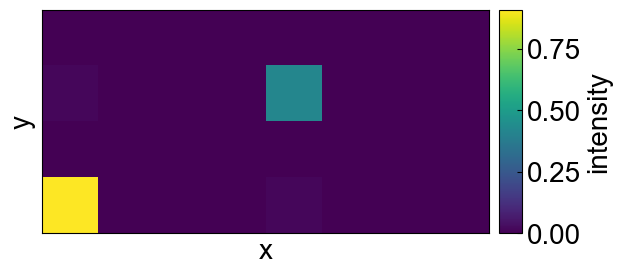

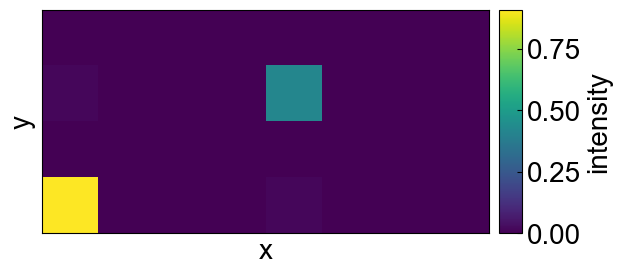

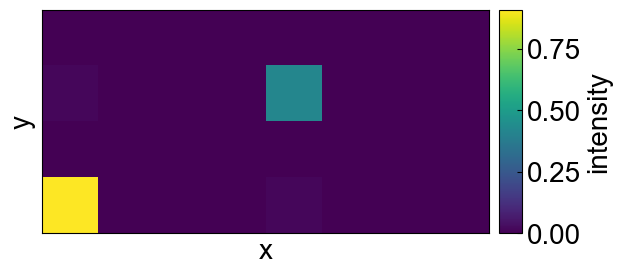

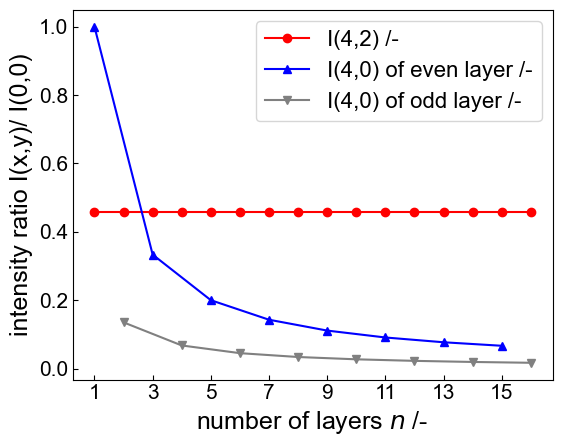

In [13]:
#Figure SI 9
"""
input_pattern
CeO2_100["A"]+CeO2_100["B"]+(CeO2_100["D"]+CeO2_100["C"]+CeO2_100["D"]+CeO2_100["B"])*n+(CeO2_100["D"]+CeO2_100["C"])*{0 or 1}+CeO2_100["A"]
vacant O layer + upper Ce layer + (O layer + downer Ce layer)*n + (O layer + upper Ce layer)*{0 or 1} + vacant O layer (1 layer of CeO2(100))
"""
del FT
FT = FTManager()
pp                       = Preprocessing(scattering_factor_O)
order_100_Oterminal      = {"preprocessings":["tile"],\
                            "tile_number"    : [4,2],\
                            "d"             : d_CeO2_100,\
                            "DW"            : DW_CeO2}
XFT_input_100_Oterminal  = pp.preprocessing_parser(CeO2_100["A"], order_100_Oterminal)
pp.clear(scattering_factor_Ce)
order_100_Ceupper        = {"preprocessings":["tile"],\
                            "tile_number"    : [4,2],\
                            "d"             : d_CeO2_100,\
                            "DW"            : DW_CeO2}
XFT_input_100_Ceupper    = pp.preprocessing_parser(CeO2_100["B"], order_100_Ceupper)
pp.clear(scattering_factor_Ce)
order_100_Cedowner       = {"preprocessings":["tile"],\
                            "tile_number"    : [4,2],\
                            "d"             : d_CeO2_100,\
                            "DW"            : DW_CeO2}
XFT_input_100_Cedowner   = pp.preprocessing_parser(CeO2_100["C"], order_100_Cedowner)
pp.clear(scattering_factor_O)
order_100_O              = {"preprocessings":["tile"],\
                            "tile_number"    : [4,2],\
                            "d"             : d_CeO2_100,\
                            "DW"            : DW_CeO2}
XFT_input_100_O          = pp.preprocessing_parser(CeO2_100["D"], order_100_O) 
relative_intensity_42       = []
relative_intensity_40_even       = []
relative_intensity_40_odd       = []
for num_layer in range(1,17):
    XFT_input                = pp.normalize(XFT_input_100_Oterminal + XFT_input_100_Ceupper + (XFT_input_100_O + XFT_input_100_Ceupper + XFT_input_100_O + XFT_input_100_Cedowner)*((num_layer-1)//2) + (XFT_input_100_O + XFT_input_100_Cedowner)*((num_layer-1)%2) + XFT_input_100_Oterminal)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    if num_layer%2 == 0:
        relative_intensity_40_odd.append([QFT[0,2]/QFT[0,0]])
    else:
        relative_intensity_40_even.append([QFT[0,2]/QFT[0,0]])
    relative_intensity_42.append([QFT[4,2]/QFT[0,0]])
x =  np.array(range(1, 17,1))
x_1 =  np.array(range(1, 17,2))
x_2 = np.array(range(2, 18,2))

y_1 = np.abs(relative_intensity_42)
y_2 = np.abs(relative_intensity_40_even)
y_3 = np.abs(relative_intensity_40_odd)
plt.rcParams['font.family'] ='Arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(x, y_1,marker="o", c= 'red')

plt.plot(x_1, y_2, marker="^",c= 'blue')
plt.plot(x_2, y_3, marker="v",c= 'gray')
plt.xlabel("number of layers $\it{ n }$ /-", fontname = 'Arial',fontsize = 18)
plt.ylabel("intensity ratio I(x,y)/ I(0,0)", fontname = 'Arial',fontsize = 18)
plt.legend(["I(4,2) /-", "I(4,0) of even layer /-", "I(4,0) of odd layer /-"],fontsize = 16)
plt.xticks(np.arange(1, 17, 2))
plt.tick_params(labelsize=15)
plt.savefig(fname = "FigS9_ver1.svg",transparent = True)
plt.show()

In [4]:
#Figure SI 12
#layer change in CeO2(111)
# if you want to show the value of position, you change the sentence "draw_heatmap" in "MultidimensionalQFT.py" 
"""
input_pattern
first_layer (CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]) +second layer (CeO2_111["D"]+CeO2_111["E"]+CeO2_111["A"])
+third layer (CeO2_111["B"]+CeO2_111["F"]+CeO2_111["C"])
first O layer + second layer + third layer (changing layer of CeO2(111))
"""
del FT
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_111_Ofirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
pp.clear(scattering_factor_Ce)
order_111_Cefirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
pp.clear(scattering_factor_Ce)
order_111_Osecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
pp.clear(scattering_factor_O)
order_111_Othird     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Othird = pp.preprocessing_parser(CeO2_111["D"], order_111_Othird)
pp.clear(scattering_factor_O)
order_111_Cesecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cesecond = pp.preprocessing_parser(CeO2_111["E"], order_111_Cesecond)
pp.clear(scattering_factor_O)
order_111_Cethird     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cethird = pp.preprocessing_parser(CeO2_111["F"], order_111_Cethird)
XFT_input        =  (XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
FT([XFT_input,XFT_input,XFT_input])
# Figure in save_path directry

[array([[ 19.74799632 +0.j        , -19.38211716 -0.00000085j,
          15.06663565 +0.00000719j,  -6.8645431  -0.00002007j,
           1.30601713 +0.00002993j,   0.00001835 -0.00003183j,
          -0.00001845 +0.00003148j,   0.00001836 -0.00002345j,
          -0.0000179  -0.j        ,   0.00001836 +0.00002345j,
          -0.00001845 -0.00003148j,   0.00001835 +0.00003183j,
           1.30601713 -0.00002993j,  -6.8645431  +0.00002007j,
          15.06663565 -0.00000719j, -19.38211716 +0.00000085j],
        [-19.38211759 -0.00000007j,  19.02301889 -0.00000184j,
         -14.78750337 +0.00001546j,   6.73739742 -0.00004319j,
          -1.28187421 +0.00006441j,   0.00003951 -0.00006845j,
          -0.00003947 +0.00006812j,   0.00003553 -0.00005735j,
          -0.00002373 +0.0000256j ,   0.00001317 +0.00000483j,
          -0.00000945 -0.00001536j,   0.00000916 +0.00001596j,
          -1.28184567 -0.00001497j,   6.73737828 +0.00001005j,
         -14.78749652 -0.0000036j ,  19.02301808 +0.00

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000001  0.00000007 -0.
  -0.00000006 -0.00000072 -0.00000017 -0.00000013 -0.00000031 -0.
   0.00000001  0.00000003  0.          0.        ]
 [ 0.          0.          0.00000005  0.00000194  0.00000075 -0.00000006
  -0.0000182  -0.00000794 -0.00001016 -0.0000429  -0.00000337 -0.00000006
   0.00000406  0.00000036  0.00000005  0.00000001]
 [ 0.          0.00000001  0.00000298  0.00000362  0.00000758 -0.00000311
  -0.00003397 -0.00008007 -0.00055277 -0.00008007 -0.00003397 -0.00000311
   0.00000758  0.00000362  0.00000298  0.00000001]
 [ 0.          0.0000003   0.0000026   0.00001703  0.00019263 -0.00000271
  -0.00015988 -0.00203514 -0.0004818  -0.00037688 -0.00086335 -0.00000271
   0.00003567  0.00009194  0.0000026   0.00000005]
 [ 0.          0.00000016  0.00000781

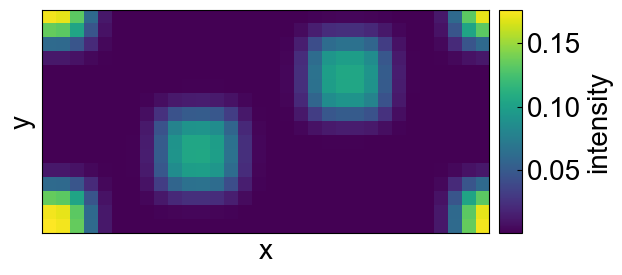

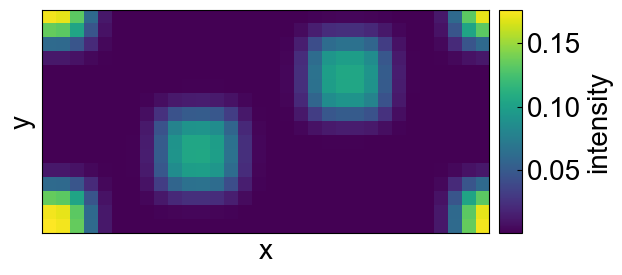

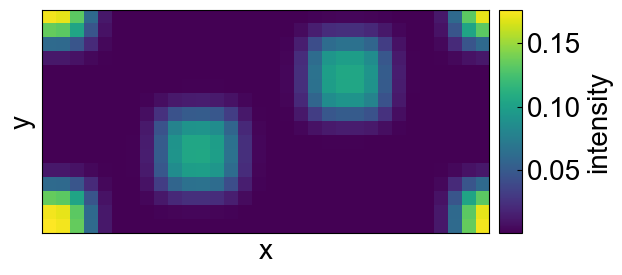

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000001  0.00000005 -0.
  -0.00000007 -0.00000051 -0.00000066 -0.00000016 -0.00000022 -0.
   0.00000002  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000007  0.00000138  0.0000029  -0.00000007
  -0.00001299 -0.00003062 -0.00001223 -0.00003062 -0.00001299 -0.00000007
   0.0000029   0.00000138  0.00000007  0.        ]
 [ 0.          0.00000001  0.00000213  0.00001394  0.00000913 -0.00000222
  -0.00013092 -0.00009644 -0.00039453 -0.00030861 -0.00004091 -0.00000222
   0.00002921  0.00000436  0.00000213  0.00000004]
 [ 0.          0.00000021  0.00001002  0.00002051  0.00013749 -0.00001045
  -0.00019256 -0.00145255 -0.00185696 -0.00045392 -0.00061621 -0.00001045
   0.00004297  0.00006562  0.00001002  0.00000007]
 [ 0.          0.00000063  0.0000094 

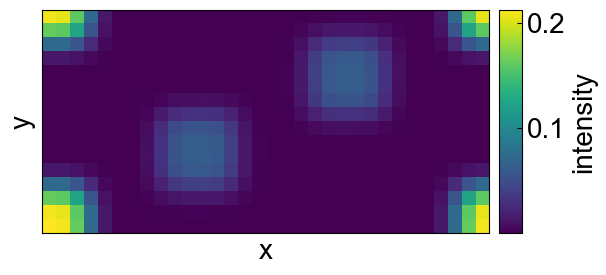

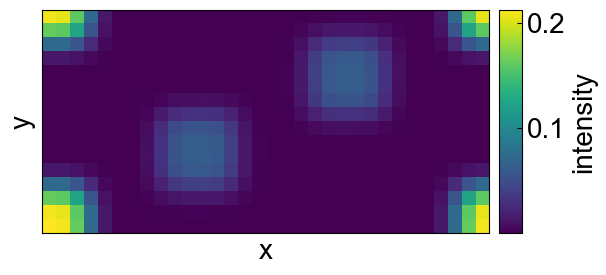

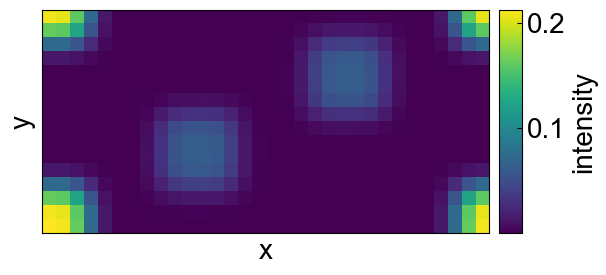

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000018 -0.00000043 -0.00000055 -0.00000043 -0.00000018 -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000018  0.00000116  0.00000242 -0.00000018
  -0.00001086 -0.0000256  -0.00003273 -0.0000256  -0.00001086 -0.00000018
   0.00000242  0.00000116  0.00000018  0.        ]
 [ 0.          0.00000004  0.00000178  0.00001166  0.00002443 -0.00000186
  -0.00010947 -0.00025806 -0.0003299  -0.00025806 -0.00010947 -0.00000186
   0.00002443  0.00001166  0.00000178  0.00000004]
 [ 0.          0.00000018  0.00000838  0.00005487  0.00011497 -0.00000874
  -0.00051527 -0.00121461 -0.00155278 -0.00121461 -0.00051527 -0.00000874
   0.00011497  0.00005487  0.00000838  0.00000018]
 [ 0.          0.00000053  0.00002517

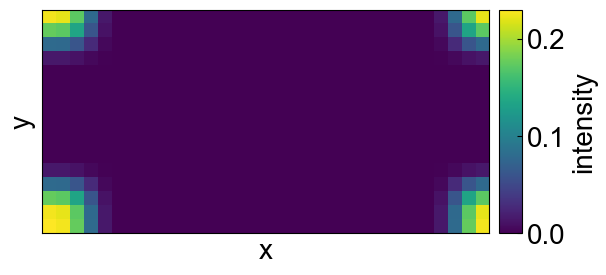

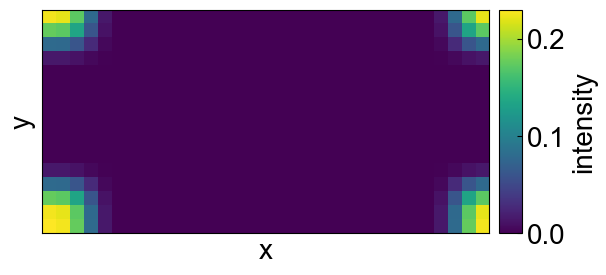

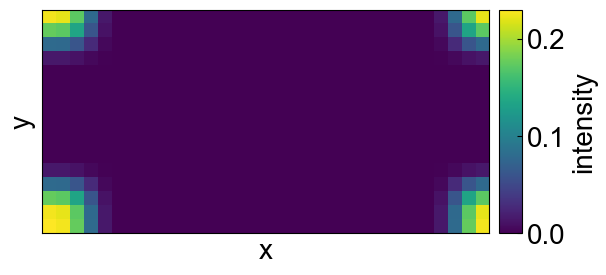

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000005 -0.
  -0.00000015 -0.00000055 -0.00000046 -0.00000036 -0.00000023 -0.
   0.00000003  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000015  0.00000147  0.00000202 -0.00000015
  -0.00001379 -0.00002133 -0.00002727 -0.00003251 -0.00000905 -0.00000015
   0.00000308  0.00000096  0.00000015  0.        ]
 [ 0.          0.00000003  0.00000226  0.00000971  0.00002035 -0.00000236
  -0.00009121 -0.000215   -0.00041883 -0.000215   -0.00009121 -0.00000236
   0.00002035  0.00000971  0.00000226  0.00000003]
 [ 0.          0.00000022  0.00000698  0.00004571  0.00014596 -0.00000728
  -0.00042929 -0.00154201 -0.00129368 -0.00101195 -0.00065416 -0.00000728
   0.00009578  0.00006966  0.00000698  0.00000015]
 [ 0.          0.00000044  0.00002097

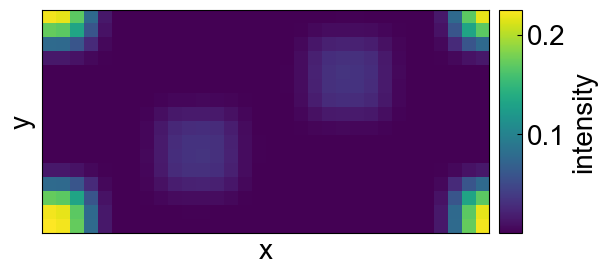

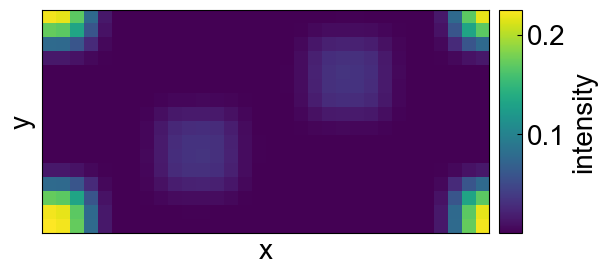

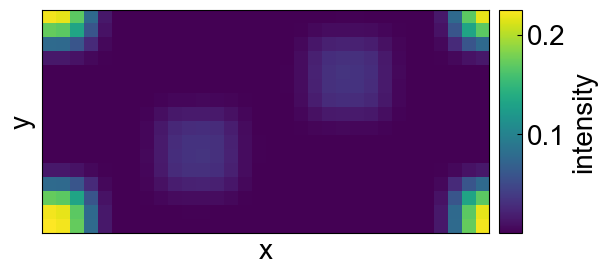

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000001  0.00000004 -0.
  -0.00000014 -0.00000047 -0.00000061 -0.00000032 -0.0000002  -0.
   0.00000003  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000013  0.00000128  0.00000267 -0.00000014
  -0.00001199 -0.00002825 -0.0000246  -0.00002825 -0.00001199 -0.00000014
   0.00000267  0.00000128  0.00000013  0.        ]
 [ 0.          0.00000003  0.00000196  0.00001286  0.00001836 -0.00000205
  -0.0001208  -0.00019396 -0.00036402 -0.00028475 -0.00008228 -0.00000205
   0.00002695  0.00000876  0.00000196  0.00000004]
 [ 0.          0.00000019  0.00000925  0.00004124  0.00012686 -0.00000964
  -0.00038728 -0.00134023 -0.00171337 -0.00091291 -0.00056856 -0.00000964
   0.00008641  0.00006054  0.00000925  0.00000013]
 [ 0.          0.00000059  0.00001891

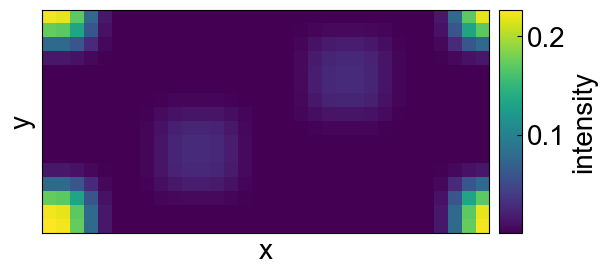

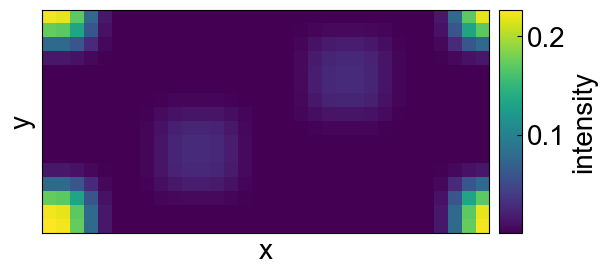

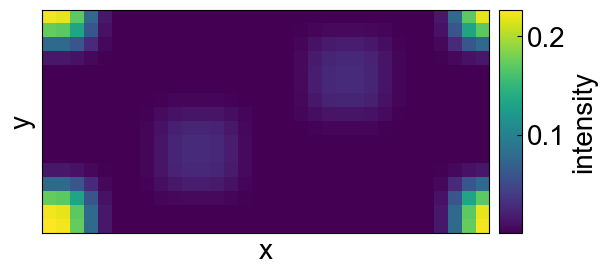

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000018 -0.00000043 -0.00000055 -0.00000043 -0.00000018 -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000018  0.00000116  0.00000242 -0.00000018
  -0.00001086 -0.0000256  -0.00003273 -0.0000256  -0.00001086 -0.00000018
   0.00000242  0.00000116  0.00000018  0.        ]
 [ 0.          0.00000004  0.00000178  0.00001166  0.00002443 -0.00000186
  -0.00010947 -0.00025806 -0.0003299  -0.00025806 -0.00010947 -0.00000186
   0.00002443  0.00001166  0.00000178  0.00000004]
 [ 0.          0.00000018  0.00000838  0.00005487  0.00011497 -0.00000874
  -0.00051527 -0.00121461 -0.00155278 -0.00121461 -0.00051527 -0.00000874
   0.00011497  0.00005487  0.00000838  0.00000018]
 [ 0.          0.00000053  0.00002517

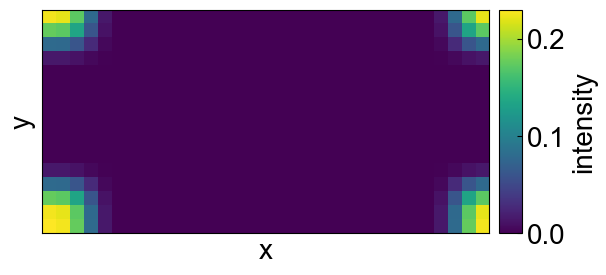

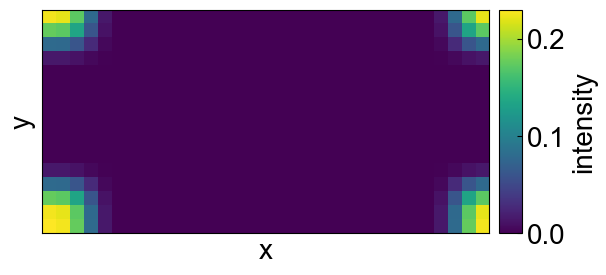

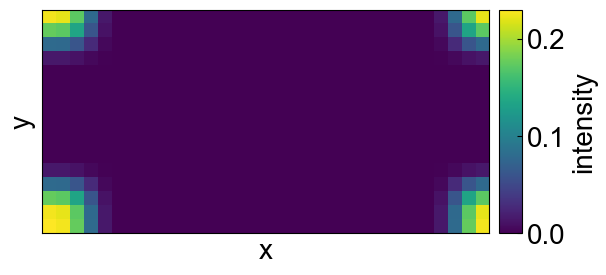

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000005 -0.
  -0.00000017 -0.0000005  -0.0000005  -0.00000039 -0.00000021 -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000016  0.00000134  0.0000022  -0.00000017
  -0.00001262 -0.00002326 -0.00002974 -0.00002974 -0.00000987 -0.00000017
   0.00000282  0.00000105  0.00000016  0.        ]
 [ 0.          0.00000003  0.00000207  0.00001059  0.00002219 -0.00000216
  -0.00009946 -0.00023445 -0.00038319 -0.00023445 -0.00009946 -0.00000216
   0.00002219  0.00001059  0.00000207  0.00000003]
 [ 0.          0.00000021  0.00000761  0.00004985  0.00013354 -0.00000794
  -0.00046813 -0.00141082 -0.00141074 -0.00110351 -0.0005985  -0.00000794
   0.00010445  0.00006373  0.00000761  0.00000016]
 [ 0.          0.00000048  0.00002286

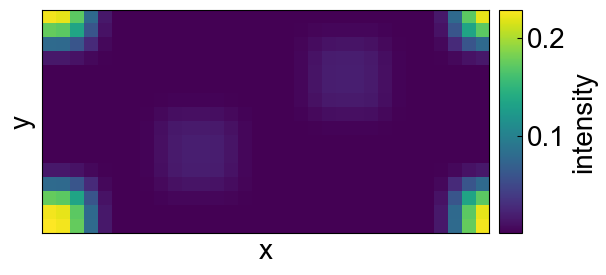

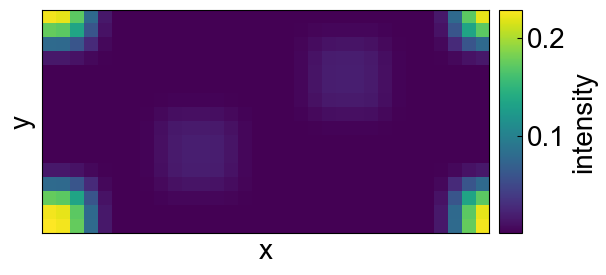

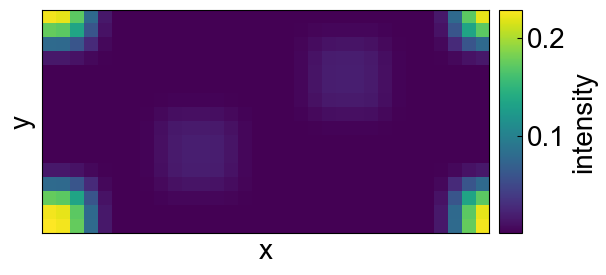

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000015 -0.00000046 -0.00000059 -0.00000036 -0.00000019 -0.
   0.00000003  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000015  0.00000124  0.00000259 -0.00000016
  -0.00001161 -0.00002736 -0.00002771 -0.00002736 -0.00001161 -0.00000016
   0.00000259  0.00000124  0.00000015  0.        ]
 [ 0.          0.00000003  0.0000019   0.00001246  0.00002068 -0.00000198
  -0.00011697 -0.00021849 -0.00035248 -0.00027572 -0.00009269 -0.00000198
   0.0000261   0.00000987  0.0000019   0.00000004]
 [ 0.          0.00000019  0.00000895  0.00004646  0.00012284 -0.00000934
  -0.00043627 -0.00129774 -0.00165905 -0.0010284  -0.00055053 -0.00000934
   0.00009734  0.00005862  0.00000895  0.00000015]
 [ 0.          0.00000057  0.00002131

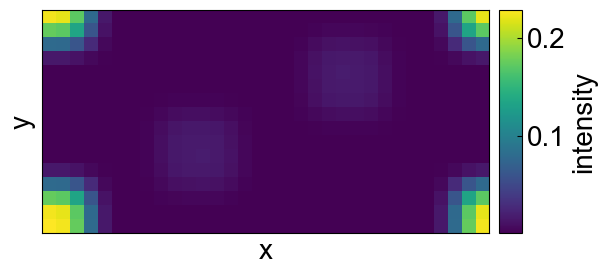

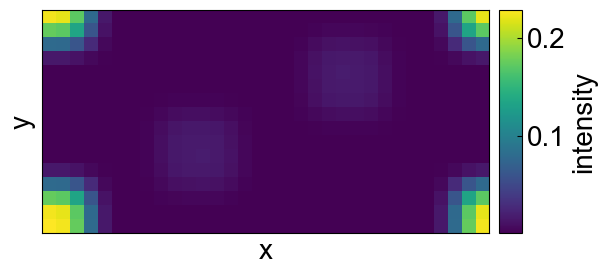

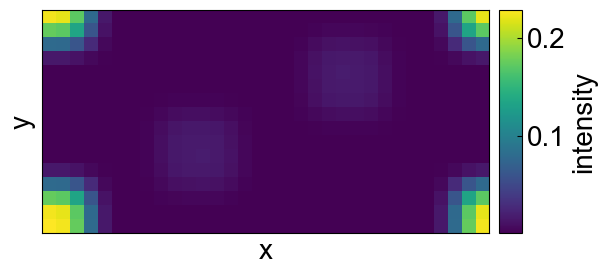

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000018 -0.00000043 -0.00000055 -0.00000043 -0.00000018 -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000018  0.00000116  0.00000242 -0.00000018
  -0.00001086 -0.0000256  -0.00003273 -0.0000256  -0.00001086 -0.00000018
   0.00000242  0.00000116  0.00000018  0.        ]
 [ 0.          0.00000004  0.00000178  0.00001166  0.00002443 -0.00000186
  -0.00010947 -0.00025806 -0.0003299  -0.00025806 -0.00010947 -0.00000186
   0.00002443  0.00001166  0.00000178  0.00000004]
 [ 0.          0.00000018  0.00000838  0.00005487  0.00011497 -0.00000874
  -0.00051527 -0.00121461 -0.00155278 -0.00121461 -0.00051527 -0.00000874
   0.00011497  0.00005487  0.00000838  0.00000018]
 [ 0.          0.00000053  0.00002517

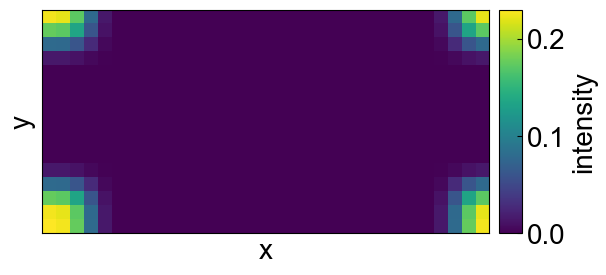

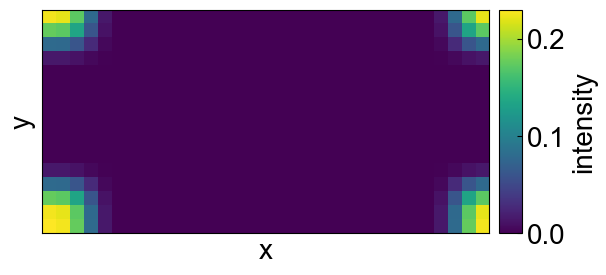

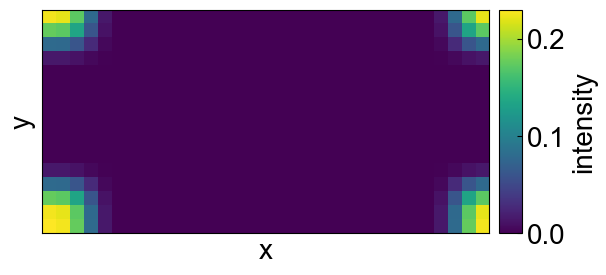

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000005 -0.
  -0.00000017 -0.00000048 -0.00000052 -0.0000004  -0.0000002  -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000017  0.00000129  0.00000227 -0.00000017
  -0.00001211 -0.000024   -0.00003068 -0.00002855 -0.00001018 -0.00000017
   0.0000027   0.00000108  0.00000017  0.        ]
 [ 0.          0.00000004  0.00000199  0.00001093  0.00002289 -0.00000207
  -0.0001026  -0.00024186 -0.00036784 -0.00024186 -0.0001026  -0.00000207
   0.00002289  0.00001093  0.00000199  0.00000004]
 [ 0.          0.0000002   0.00000785  0.00005143  0.00012819 -0.00000819
  -0.00048293 -0.00135428 -0.00145531 -0.00113838 -0.00057452 -0.00000819
   0.00010775  0.00006118  0.00000785  0.00000017]
 [ 0.          0.0000005   0.00002359

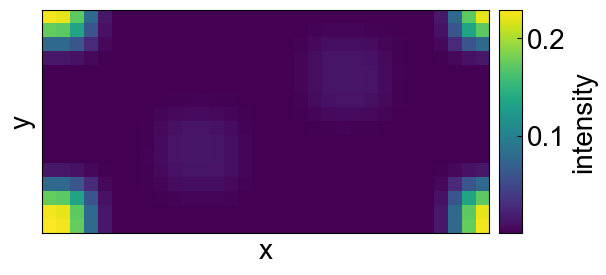

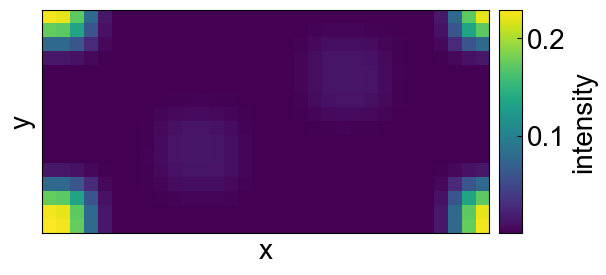

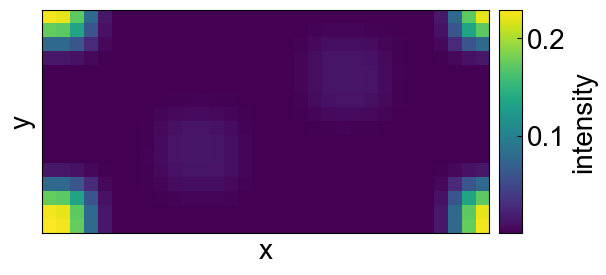

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000016 -0.00000045 -0.00000058 -0.00000038 -0.00000019 -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000016  0.00000122  0.00000255 -0.00000016
  -0.00001142 -0.00002691 -0.00002911 -0.00002691 -0.00001142 -0.00000016
   0.00000255  0.00000122  0.00000016  0.        ]
 [ 0.          0.00000003  0.00000187  0.00001225  0.00002172 -0.00000195
  -0.00011506 -0.00022949 -0.00034672 -0.00027122 -0.00009735 -0.00000195
   0.00002567  0.00001037  0.00000187  0.00000004]
 [ 0.          0.00000019  0.00000881  0.0000488   0.00012083 -0.00000919
  -0.00045823 -0.00127654 -0.00163195 -0.00108015 -0.00054154 -0.00000919
   0.00010224  0.00005767  0.00000881  0.00000016]
 [ 0.          0.00000056  0.00002238

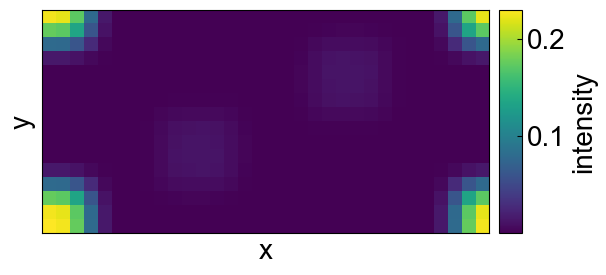

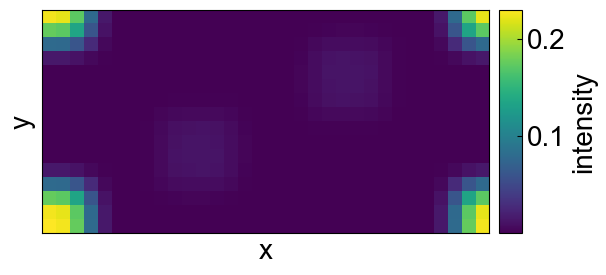

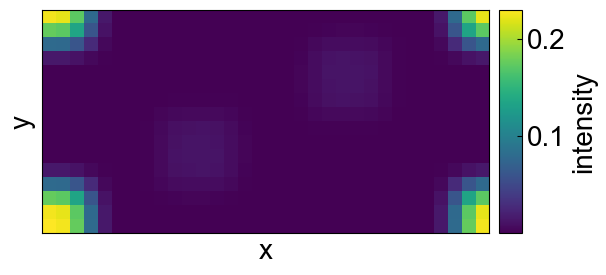

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000018 -0.00000043 -0.00000055 -0.00000043 -0.00000018 -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000018  0.00000116  0.00000242 -0.00000018
  -0.00001086 -0.0000256  -0.00003273 -0.0000256  -0.00001086 -0.00000018
   0.00000242  0.00000116  0.00000018  0.        ]
 [ 0.          0.00000004  0.00000178  0.00001166  0.00002443 -0.00000186
  -0.00010947 -0.00025806 -0.0003299  -0.00025806 -0.00010947 -0.00000186
   0.00002443  0.00001166  0.00000178  0.00000004]
 [ 0.          0.00000018  0.00000838  0.00005487  0.00011497 -0.00000874
  -0.00051527 -0.00121461 -0.00155278 -0.00121461 -0.00051527 -0.00000874
   0.00011497  0.00005487  0.00000838  0.00000018]
 [ 0.          0.00000053  0.00002517

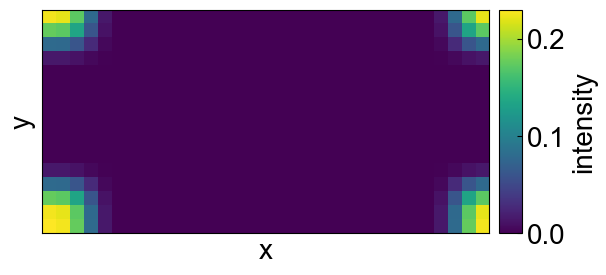

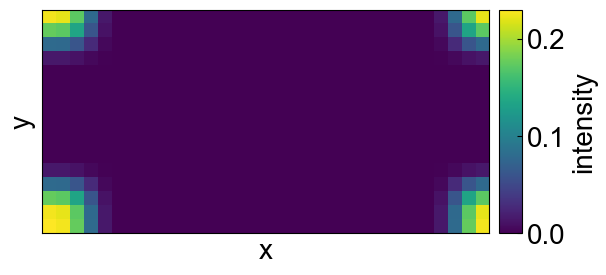

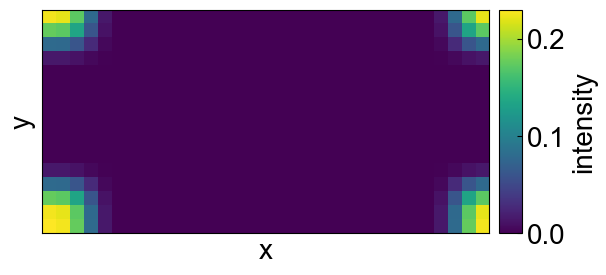

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000017 -0.00000047 -0.00000052 -0.00000041 -0.0000002  -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000017  0.00000126  0.00000231 -0.00000018
  -0.00001183 -0.00002438 -0.00003117 -0.00002789 -0.00001034 -0.00000018
   0.00000264  0.0000011   0.00000017  0.        ]
 [ 0.          0.00000004  0.00000194  0.0000111   0.00002326 -0.00000202
  -0.00010425 -0.00024574 -0.00035933 -0.00024574 -0.00010425 -0.00000202
   0.00002326  0.0000111   0.00000194  0.00000004]
 [ 0.          0.00000019  0.00000798  0.00005225  0.00012522 -0.00000832
  -0.00049068 -0.00132296 -0.00147866 -0.00115664 -0.00056123 -0.00000832
   0.00010948  0.00005976  0.00000798  0.00000017]
 [ 0.          0.00000051  0.00002396

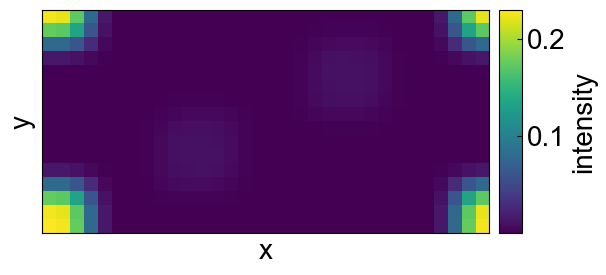

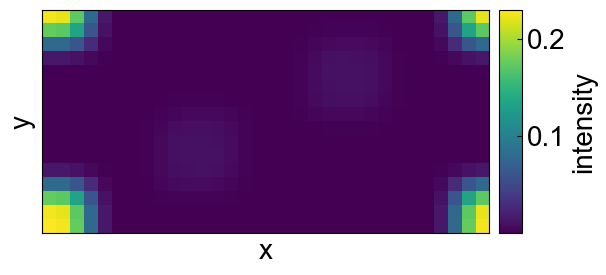

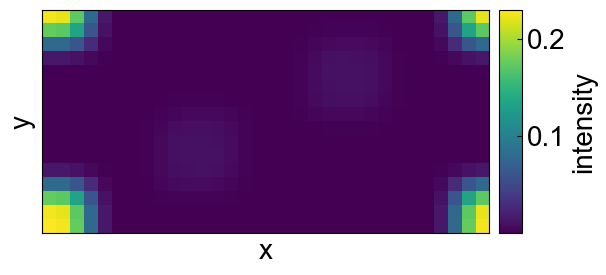

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000017 -0.00000045 -0.00000057 -0.00000039 -0.00000019 -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000016  0.0000012   0.00000252 -0.00000017
  -0.0000113  -0.00002664 -0.0000299  -0.00002664 -0.0000113  -0.00000017
   0.00000252  0.0000012   0.00000016  0.        ]
 [ 0.          0.00000003  0.00000185  0.00001213  0.00002231 -0.00000193
  -0.00011392 -0.00023571 -0.0003433  -0.00026853 -0.00009999 -0.00000193
   0.00002542  0.00001065  0.00000185  0.00000004]
 [ 0.          0.00000018  0.00000872  0.00005012  0.00011963 -0.00000909
  -0.00047065 -0.00126392 -0.00161581 -0.00110944 -0.00053619 -0.00000909
   0.00010501  0.0000571   0.00000872  0.00000016]
 [ 0.          0.00000055  0.00002299

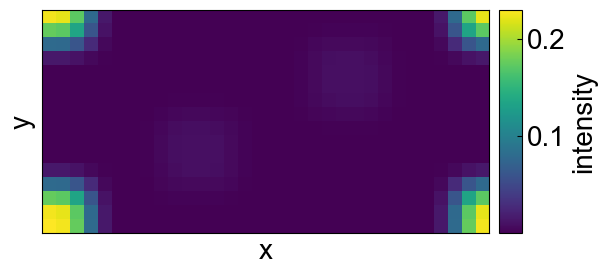

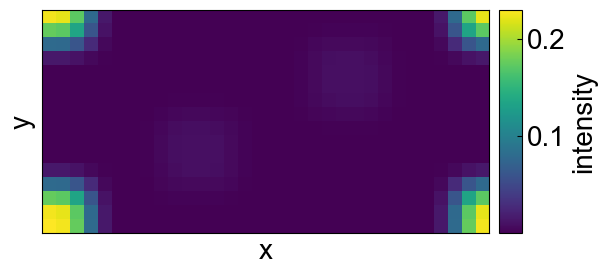

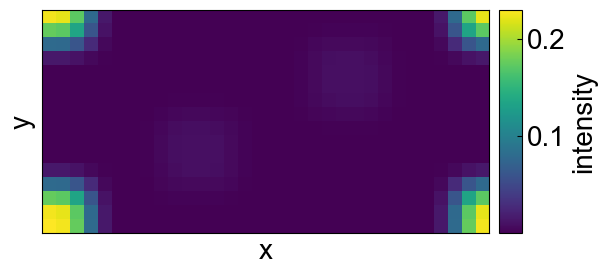

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000018 -0.00000043 -0.00000055 -0.00000043 -0.00000018 -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000018  0.00000116  0.00000242 -0.00000018
  -0.00001086 -0.0000256  -0.00003273 -0.0000256  -0.00001086 -0.00000018
   0.00000242  0.00000116  0.00000018  0.        ]
 [ 0.          0.00000004  0.00000178  0.00001166  0.00002443 -0.00000186
  -0.00010947 -0.00025806 -0.0003299  -0.00025806 -0.00010947 -0.00000186
   0.00002443  0.00001166  0.00000178  0.00000004]
 [ 0.          0.00000018  0.00000838  0.00005487  0.00011497 -0.00000874
  -0.00051527 -0.00121461 -0.00155278 -0.00121461 -0.00051527 -0.00000874
   0.00011497  0.00005487  0.00000838  0.00000018]
 [ 0.          0.00000053  0.00002517

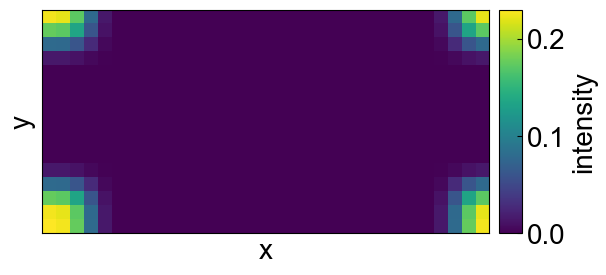

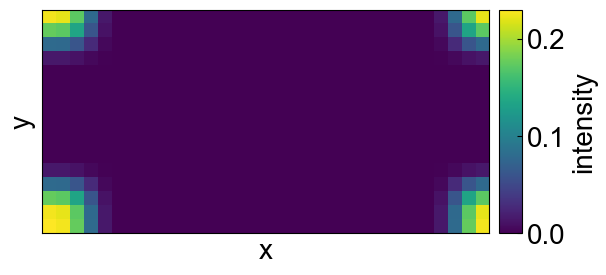

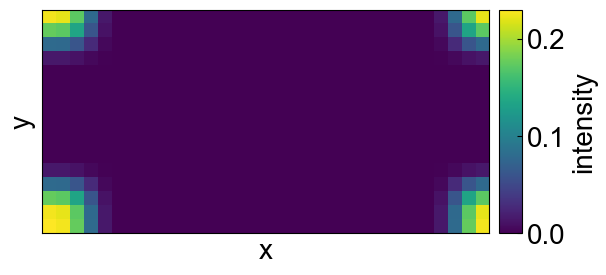

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000018 -0.00000046 -0.00000053 -0.00000041 -0.0000002  -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000017  0.00000124  0.00000233 -0.00000018
  -0.00001165 -0.00002462 -0.00003147 -0.00002747 -0.00001044 -0.00000018
   0.0000026   0.00000111  0.00000017  0.        ]
 [ 0.          0.00000004  0.00000191  0.00001121  0.00002349 -0.00000199
  -0.00010526 -0.00024813 -0.00035393 -0.00024813 -0.00010526 -0.00000199
   0.00002349  0.00001121  0.00000191  0.00000004]
 [ 0.          0.00000019  0.00000806  0.00005276  0.00012334 -0.0000084
  -0.00049544 -0.00130309 -0.00149301 -0.00116786 -0.0005528  -0.0000084
   0.00011054  0.00005887  0.00000806  0.00000017]
 [ 0.          0.00000051  0.0000242   

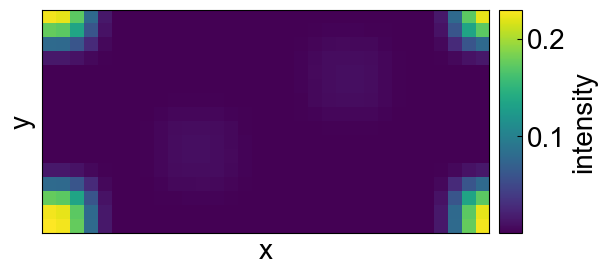

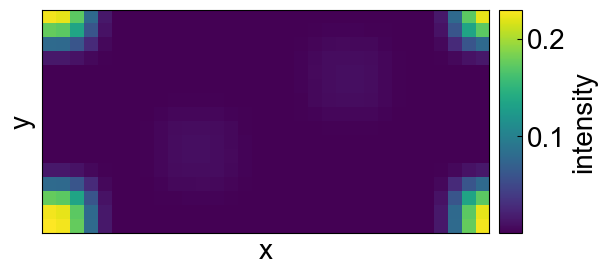

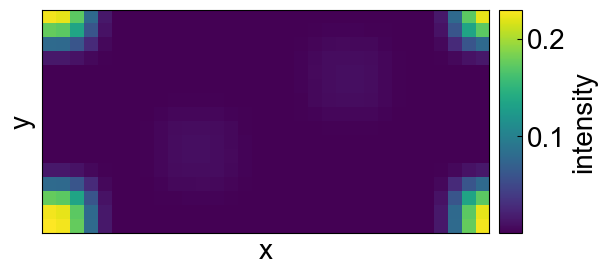

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000017 -0.00000044 -0.00000057 -0.0000004  -0.00000019 -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000016  0.0000012   0.00000251 -0.00000017
  -0.00001123 -0.00002647 -0.00003041 -0.00002647 -0.00001123 -0.00000017
   0.00000251  0.0000012   0.00000016  0.        ]
 [ 0.          0.00000003  0.00000184  0.00001205  0.00002269 -0.00000192
  -0.00011316 -0.00023971 -0.00034103 -0.00026676 -0.00010169 -0.00000192
   0.00002525  0.00001083  0.00000184  0.00000004]
 [ 0.          0.00000018  0.00000866  0.00005097  0.00011884 -0.00000903
  -0.00047864 -0.00125556 -0.00160512 -0.00112827 -0.00053264 -0.00000903
   0.00010679  0.00005672  0.00000866  0.00000016]
 [ 0.          0.00000055  0.00002338

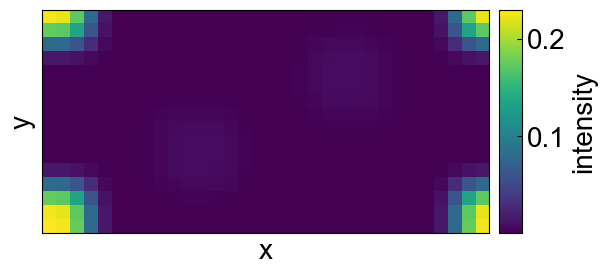

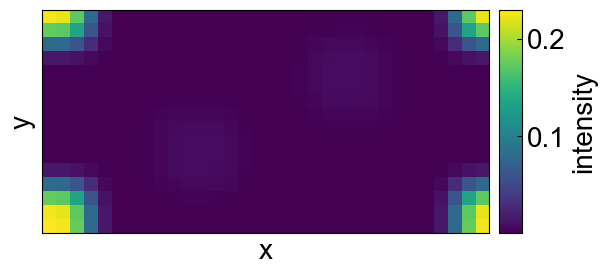

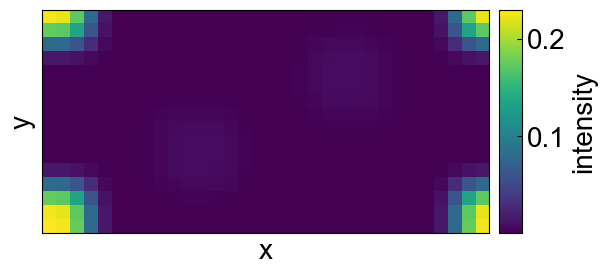

[[ 0.          0.          0.          0.          0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.00000002  0.00000004 -0.
  -0.00000018 -0.00000043 -0.00000055 -0.00000043 -0.00000018 -0.
   0.00000004  0.00000002  0.          0.        ]
 [ 0.          0.          0.00000018  0.00000116  0.00000242 -0.00000018
  -0.00001086 -0.0000256  -0.00003273 -0.0000256  -0.00001086 -0.00000018
   0.00000242  0.00000116  0.00000018  0.        ]
 [ 0.          0.00000004  0.00000178  0.00001166  0.00002443 -0.00000186
  -0.00010947 -0.00025806 -0.0003299  -0.00025806 -0.00010947 -0.00000186
   0.00002443  0.00001166  0.00000178  0.00000004]
 [ 0.          0.00000018  0.00000838  0.00005487  0.00011497 -0.00000874
  -0.00051527 -0.00121461 -0.00155278 -0.00121461 -0.00051527 -0.00000874
   0.00011497  0.00005487  0.00000838  0.00000018]
 [ 0.          0.00000053  0.00002517

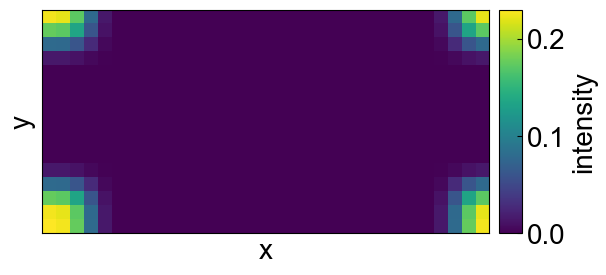

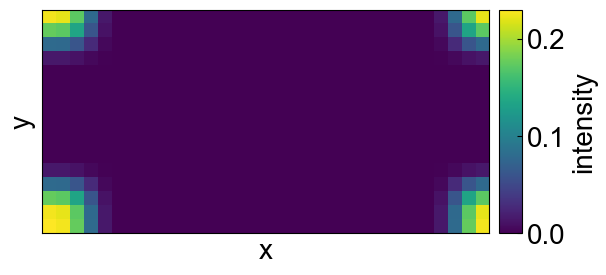

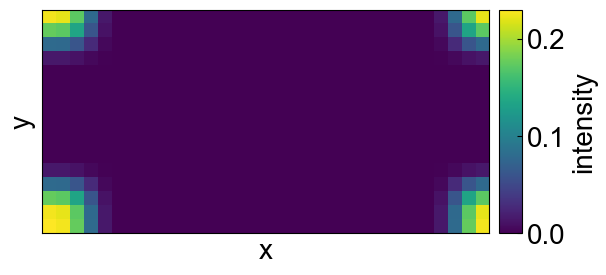

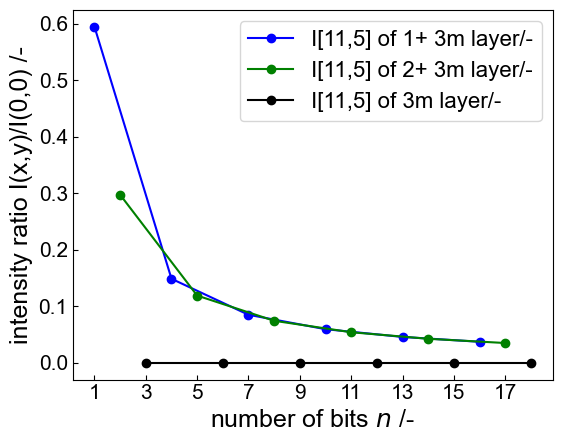

In [14]:
#Figure SI 13
#layer change in CeO2(111) 
"""
input_pattern
first_layer (CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]) +second layer (CeO2_111["D"]+CeO2_111["E"]+CeO2_111["A"])
+third layer (CeO2_111["B"]+CeO2_111["F"]+CeO2_111["C"])
first O layer + second layer + third layer (changing layer of CeO2(111))
"""
del FT
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_111_Ofirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
pp.clear(scattering_factor_Ce)
order_111_Cefirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
pp.clear(scattering_factor_Ce)
order_111_Osecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
pp.clear(scattering_factor_O)
order_111_Othird     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Othird = pp.preprocessing_parser(CeO2_111["D"], order_111_Othird)
pp.clear(scattering_factor_O)
order_111_Cesecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cesecond = pp.preprocessing_parser(CeO2_111["E"], order_111_Cesecond)
pp.clear(scattering_factor_O)
order_111_Cethird     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cethird = pp.preprocessing_parser(CeO2_111["F"], order_111_Cethird)

relative_intensity_115       = []
relative_intensity_115_0     = []
relative_intensity_115_1     = []
relative_intensity_115_2     = []
for num_layer in range(1,19):
    if num_layer%3 ==0:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3))
    elif num_layer%3 ==1:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3)+(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond))
    else:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3)+(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst))
    print(XFT_input)
    DFT,FFT,QFT      = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_115.append([QFT[11,5]/QFT[0,0]])
    if num_layer%3 == 0:
        relative_intensity_115_0.append([QFT[10,5]/QFT[0,0]])
    elif num_layer%3 ==1:
        relative_intensity_115_1.append([QFT[10,5]/QFT[0,0]])
    else :
        relative_intensity_115_2.append([QFT[10,5]/QFT[0,0]])
x_1 =  np.array(range(1, 19,3))
x_2 = np.array(range(2, 20,3))
x_3 = np.array(range(3, 21,3))

y_2 = np.abs(relative_intensity_115_1)
y_3 = np.abs(relative_intensity_115_2)
y_4 = np.abs(relative_intensity_115_0)
plt.rcParams['font.family'] ='Arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(x_1, y_2,marker="o", c= 'blue')
plt.plot(x_2, y_3,marker="o", c= 'green')
plt.plot(x_3, y_4,marker="o", c= 'black')

plt.xlabel("number of bits $\it{ n }$ /-", fontname = 'Arial',fontsize = 18)
plt.ylabel("intensity ratio I(x,y)/I(0,0) /-", fontname = 'Arial',fontsize = 18)
plt.legend(["I[10,5] of 1+ 3m layer/-","I[10,5] of 2+ 3m layer/-","I[10,5] of 3m layer/-"],fontsize = 16)
plt.xticks(np.arange(1, 19, 2))
plt.tick_params(labelsize=15)
plt.savefig(fname = "FigS13_ver3.svg",transparent = True)
plt.show()